In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from collections import Counter
import gzip

In [2]:
root_path='/opt/workspace/data/DATASET/mimic4_2.2'
icu_path=f'{root_path}/icu/'
hosp_path=f'{root_path}/hosp/'

In [24]:
icu_stay = pd.read_csv(gzip.open(f'{icu_path}/icustays.csv.gz'))
admission = pd.read_csv(gzip.open(f'{hosp_path}/admissions.csv.gz'))
patients = pd.read_csv(gzip.open(f'{hosp_path}/patients.csv.gz'))
transfers = pd.read_csv(gzip.open(f'{hosp_path}/transfers.csv.gz'))
drgcodes = pd.read_csv(gzip.open(f'{hosp_path}/drgcodes.csv.gz'))
diagnoses_icd = pd.read_csv(gzip.open(f'{hosp_path}/diagnoses_icd.csv.gz'))
d_diagnoses_icd = pd.read_csv(gzip.open(f'{hosp_path}/d_icd_diagnoses.csv.gz'))

In [46]:
diagnoses_icd_merge = pd.merge(diagnoses_icd, d_diagnoses_icd)
diagnoses_icd_merge = diagnoses_icd_merge[diagnoses_icd_merge['seq_num']<=5]

In [ ]:
total=pd.DataFrame([])

for id in drgcodes['subject_id'].unique():
    a= drgcodes[drgcodes['subject_id']==id]
    if a.shape[0]%2!=0:
        total=pd.concat([total, a])
        # print(a)


In [56]:
b=pd.merge(diagnoses_icd_merge, drgcodes)

In [62]:
cols = ["admittime", "dischtime", "edregtime", "edouttime"]
admission[cols] = admission[cols].apply(lambda col: pd.to_datetime(col))

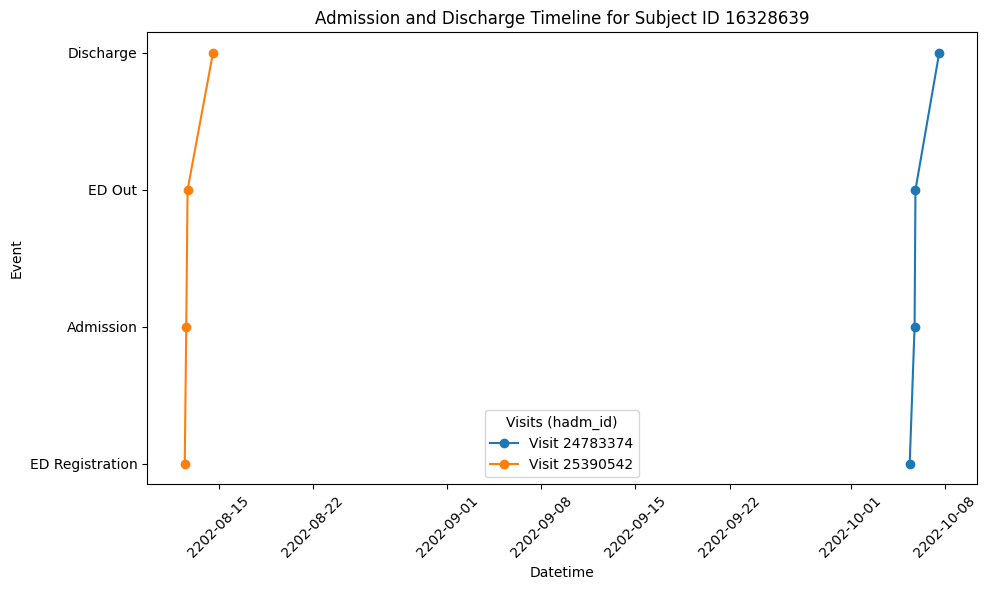

In [76]:
subject_data = admission[admission['subject_id'] == 16328639]
subject_data = subject_data.dropna(subset=["admittime", "dischtime", "edregtime", "edouttime"])
plt.figure(figsize=(10, 6))

# Plot each visit as a separate line
for _, row in subject_data.iterrows():
    times = [row['edregtime'], row['admittime'], row['edouttime'], row['dischtime']]
    labels = ['ED Registration', 'Admission', 'ED Out', 'Discharge']
    plt.plot(times, labels, marker='o', linestyle='-', label=f"Visit {row['hadm_id']}")

plt.xlabel('Datetime')
plt.ylabel('Event')
plt.title(f'Admission and Discharge Timeline for Subject ID {16328639}')
plt.legend(title="Visits (hadm_id)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [77]:
labevents = pd.read_csv(gzip.open(f'{hosp_path}/labevents.csv.gz'))

In [ ]:
Counter(labevents['value'])

Counter({'STAT': 60705377, 'ROUTINE': 51745872, nan: 5720118})

In [84]:
labevents[labevents['value']!=labevents['valuenum']]

,labevent_id,subject_id,hadm_id,specimen_id,itemid,order_provider_id,charttime,storetime,value,valuenum,valueuom,ref_range_lower,ref_range_upper,flag,priority,comments
0,1,10000032,NaN,45421181,51237,P28Z0X,2180-03-23 11:51:00,2180-03-23 15:15:00,1.4,1.40,NaN,0.9,1.1,abnormal,ROUTINE,NaN
1,2,10000032,NaN,45421181,51274,P28Z0X,2180-03-23 11:51:00,2180-03-23 15:15:00,___,15.10,sec,9.4,12.5,abnormal,ROUTINE,VERIFIED.
2,3,10000032,NaN,52958335,50853,P28Z0X,2180-03-23 11:51:00,2180-03-25 11:06:00,___,15.00,ng/mL,30.0,60.0,abnormal,ROUTINE,NEW ASSAY IN USE ___: DETECTS D2 AND D3 25-OH ...
3,4,10000032,NaN,52958335,50861,P28Z0X,2180-03-23 11:51:00,2180-03-23 16:40:00,102,102.00,IU/L,0.0,40.0,abnormal,ROUTINE,NaN
4,5,10000032,NaN,52958335,50862,P28Z0X,2180-03-23 11:51:00,2180-03-23 16:40:00,3.3,3.30,g/dL,3.5,5.2,abnormal,ROUTINE,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118171362,118352501,19999987,23865745.0,85842100,51279,NaN,2145-11-09 05:30:00,2145-11-09 07:06:00,3.52,3.52,m/uL,4.2,5.4,abnormal,ROUTINE,NaN
118171363,118352502,19999987,23865745.0,85842100,51301,NaN,2145-11-09 05:30:00,2145-11-09 07:06:00,5.7,5.70,K/uL,4.0,11.0,NaN,ROUTINE,NaN
118171364,118352503,19999987,NaN,12592768,50912,P09IS0,2146-02-07 11:13:00,2146-02-07 16:26:00,1.1,1.10,mg/dL,0.4,1.1,NaN,ROUTINE,NaN
118171365,118352504,19999987,NaN,12592768,50920,P09IS0,2146-02-07 11:13:00,2146-02-07 16:26:00,NaN,NaN,NaN,NaN,NaN,NaN,ROUTINE,"Using this patient's age, gender, and serum cr..."


In [4]:
# admission = pd.read_csv('/opt/workspace/a.csv', index_col=[0])
admission = pd.read_csv(gzip.open(f'{hosp_path}/admissions.csv.gz'))
icu_stay = pd.read_csv(gzip.open(f'{icu_path}/icustays.csv.gz'))
dataset = pd.merge(admission, icu_stay, on=['subject_id', 'hadm_id'], how='left')
# cols=["admittime", "dischtime", "edregtime", "edouttime", 'intime', 'outtime']
# admission[cols] = admission[cols].apply(lambda col: pd.to_datetime(col))

In [5]:
cols=["admittime", "dischtime", "edregtime", "edouttime", 'intime', 'outtime']
dataset[cols] = dataset[cols].apply(pd.to_datetime)
# dataset[cols] = dataset[cols].fillna(pd.to_datetime(np.nan))

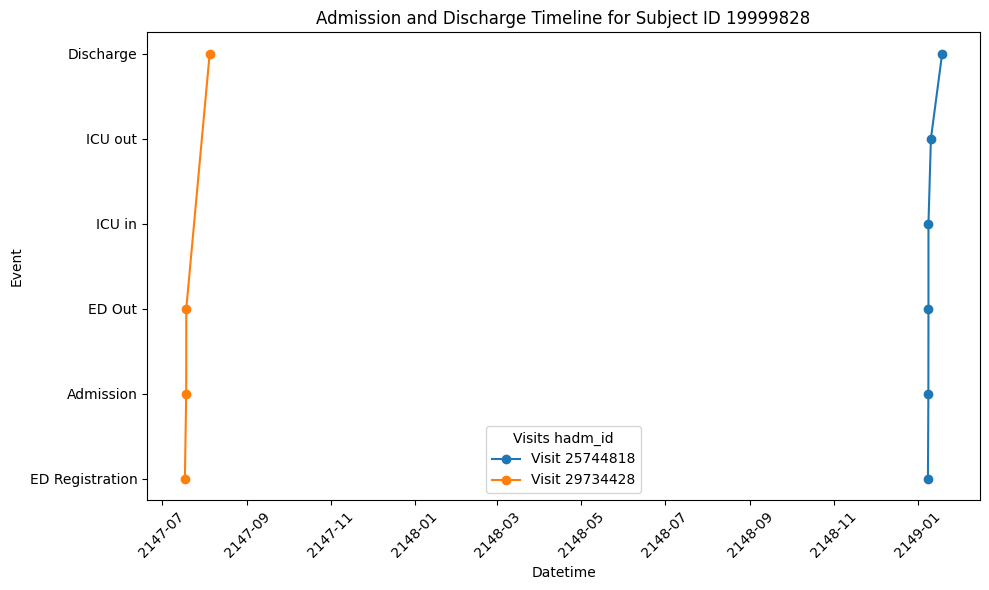

In [13]:
sbj=19999828
subject_data = dataset[dataset['subject_id'] == sbj]
# subject_data = subject_data.dropna(subset=['intime', 'outtime'])
plt.figure(figsize=(10, 6))

# Plot each visit as a separate line
for _, row in subject_data.iterrows():
    # 시간과 이벤트를 함께 리스트로 결합
    # print(row)
    events = [
        (time, label) for time, label in zip(
            [row['edregtime'], row['admittime'], row['edouttime'], row['dischtime'], row['intime'], row['outtime']],
            ['ED Registration', 'Admission', 'ED Out', 'Discharge', 'ICU in', 'ICU out']
        ) if pd.notna(time)  # NaT 값이 아닌 값만 선택
    ]
    
    # 정렬된 시간과 레이블을 분리
    if events:  # events가 비어 있지 않은 경우만 플롯
        sorted_times, sorted_labels = zip(*sorted(events))
        plt.plot(sorted_times, sorted_labels, marker='o', linestyle='-', label=f"Visit {row['hadm_id']}")

    # events = sorted(
    #     zip([row['edregtime'], row['admittime'], row['edouttime'], row['dischtime'], row['intime'], row['outtime']],
    #         ['ED Registration', 'Admission', 'ED Out', 'Discharge', 'ICU in', 'ICU out'])
    # )
    
    # # 정렬된 시간과 레이블을 분리
    # sorted_times, sorted_labels = zip(*events)
    
    # plt.plot(sorted_times, sorted_labels, marker='o', linestyle='-', label=f"Visit {row['hadm_id']}")

plt.xlabel('Datetime')
plt.ylabel('Event')
plt.title(f'Admission and Discharge Timeline for Subject ID {sbj}')
plt.legend(title=f"Visits hadm_id")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
for sbj in dataset['subject_id'].unique():
    # Plot each visit as a separate line
    subject_data = dataset[dataset['subject_id'] == sbj]
    subject_data = subject_data.dropna(subset=["admittime", "dischtime", "edregtime", "edouttime", 'intime', 'outtime'])
    plt.figure(figsize=(10, 6))

    # Plot each visit as a separate line
    for _, row in subject_data.iterrows():
        # 시간과 이벤트를 함께 리스트로 결합
        events = sorted(
            zip([row['edregtime'], row['admittime'], row['edouttime'], row['dischtime'], row['intime'], row['outtime']],
                ['ED Registration', 'Admission', 'ED Out', 'Discharge', 'ICU in', 'ICU out'])
        )
        
        # 정렬된 시간과 레이블을 분리
        sorted_times, sorted_labels = zip(*events)
        
        plt.plot(sorted_times, sorted_labels, marker='o', linestyle='-', label=f"Visit {row['hadm_id']}")

    plt.xlabel('Datetime')
    plt.ylabel('Event')
    plt.title(f'Admission and Discharge Timeline for Subject ID {sbj}')
    plt.legend(title=f"Visits hadm_id")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### sequence data 확인

In [2]:
root_path='/opt/workspace/data/DATASET/mimic4_2.2'
icu_path=f'{root_path}/icu/'
hosp_path=f'{root_path}/hosp/'
preprocessed_path = '/opt/workspace/data/MIMIC/Preprocessed_Data3'

In [3]:
chart = pd.read_csv(f"{preprocessed_path}/chartevents.csv")
icd = pd.read_csv(f"{preprocessed_path}/icd.csv")
hw = pd.read_csv(f"{preprocessed_path}/hw.csv")
inputs = pd.read_csv(f"{preprocessed_path}/inputevents.csv")
outputs = pd.read_csv(f"{preprocessed_path}/outputevents.csv")
lab = pd.read_csv(f"{preprocessed_path}/labevents.csv")
basic = pd.read_csv(f"{preprocessed_path}/mimic4_mortality.csv")

In [4]:
chart.head()

,subject_id,hadm_id,storetime,% Minute Volume,ART BP Mean,ATC %,Abdominal Changes: Observation,Activity / Mobility (JHHLM),Activity / Mobility (RN Daily Mobility Goal),Agitation,...,Vd/Vt Ratio,Ventilator Mode,Ventilator Mode (Hamilton),Ventilator Tank,Ventilator Type,Visual Disturbances,Vital Cap,Vti High,Yawning,Yawning (COWS)
0,10000032,29079034,2180-07-23 14:17:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10000032,29079034,2180-07-23 14:20:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10000032,29079034,2180-07-23 14:23:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10000032,29079034,2180-07-23 14:43:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10000032,29079034,2180-07-23 14:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
icd.head()

,subject_id,hadm_id,seq_num,icd_code,long_title
0,10000032,22595853,1,5723,Portal hypertension
1,10000032,22595853,2,78959,Other ascites
2,10000032,22595853,3,5715,Cirrhosis of liver without mention of alcohol
3,10000032,22595853,4,07070,Unspecified viral hepatitis C without hepatic ...
4,10000032,22595853,5,496,"Chronic airway obstruction, not elsewhere clas..."


In [6]:
hw.head()

,subject_id,hadm_id,year_month,Height (cm),Admission Weight (Kg)
0,10000032,29079034,2180-07,152.0,39.4
1,10000980,26913865,2189-06,NaN,76.2
2,10000980,26913865,2189-06,NaN,76.2
3,10001217,24597018,2157-11,NaN,71.2
4,10001217,27703517,2157-12,NaN,74.8


In [7]:
inputs.head()

,subject_id,hadm_id,starttime,endtime,amount,rate,patientweight,dur_input,unique_label
0,10000980,26913865,2189-06-27 07:40:00,2189-06-27 07:41:00,1.000000,60.00000,76.2,0.016667,Cefepime
1,10000980,26913865,2189-06-27 07:40:00,2189-06-27 07:41:00,1.000000,60.00000,76.2,0.016667,Vancomycin
2,10000980,26913865,2189-06-27 10:51:00,2189-06-27 10:52:00,1.000000,60.00000,76.2,0.016667,Ceftriaxone
3,10000980,26913865,2189-06-27 12:00:00,2189-06-27 12:01:00,1.000000,60.00000,76.2,0.016667,Levofloxacin
4,10000980,26913865,2189-06-27 12:54:00,2189-06-27 12:55:00,40.000003,2400.00017,76.2,0.016667,Furosemide (Lasix)


In [8]:
outputs.head()

,subject_id,hadm_id,charttime,Anderson,Anderson (gastric),Blakemore,Cath Lab,Cerebral Subdural,Cerebral Ventricular,Chest Tube,...,Stool,Straight Cath,Sump,Suprapubic,T Tube,TF Residual,TF Residual Output,Tap,Void,Wound Vac
0,10000032,29079034,2180-07-23 15:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,175.0,0.0
1,10000980,26913865,2189-06-27 09:08:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10000980,26913865,2189-06-27 11:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10000980,26913865,2189-06-27 13:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10000980,26913865,2189-06-27 14:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
lab.head()

,subject_id,hadm_id,storetime,label,valuenum,ref_range_lower,ref_range_upper,flag
0,15088925,22870427.0,2115-01-27 22:51:00,Absolute Lymphocyte Count,1.88,1.2,3.7,0
1,12553622,27913390.0,2163-10-12 18:58:00,Alanine Aminotransferase (ALT),15.00,0.0,40.0,0
2,10000032,22595853.0,2180-05-06 22:42:00,Basophils,0.80,0.0,2.0,0
3,16780697,27550779.0,2146-08-27 13:28:00,Chloride,106.00,96.0,108.0,0
4,19318235,27968771.0,2161-01-09 07:00:00,Glucose,107.00,70.0,105.0,1


In [10]:
basic.head()

,subject_id,hadm_id,admittime,dischtime,admission_type,admission_location,discharge_location,edregtime,edouttime,hospital_expire_flag,...,last_careunit,intime,outtime,los,dur_before_ed,dur_before_icu,dur_icu,dur_ed,dur_inhospital,mortality
0,10000032,29079034,2180-07-23 05:54:00,2180-07-25 17:55:00,EW EMER.,EMERGENCY ROOM,HOME,2180-07-23 05:54:00,2180-07-23 14:00:00,0,...,MICU,2180-07-23 14:00:00,2180-07-23 23:50:47,0.410266,0.0,8.100000,9.846389,8.100000,60.016667,45
1,10000980,26913865,2189-06-27 06:25:00,2189-07-03 03:00:00,EW EMER.,EMERGENCY ROOM,HOME HEALTH CARE,2189-06-27 06:25:00,2189-06-27 08:42:00,0,...,MICU,2189-06-27 08:42:00,2189-06-27 20:38:27,0.497535,0.0,2.283333,11.940833,2.283333,140.583333,1514
2,10001217,24597018,2157-11-18 17:38:00,2157-11-25 18:00:00,EW EMER.,EMERGENCY ROOM,HOME HEALTH CARE,2157-11-18 17:38:00,2157-11-19 01:24:00,0,...,SICU,2157-11-20 19:18:02,2157-11-21 22:08:00,1.118032,0.0,49.667222,26.832778,7.766667,168.366667,23775
3,10001217,27703517,2157-12-18 16:58:00,2157-12-24 14:55:00,DIRECT EMER.,PHYSICIAN REFERRAL,HOME HEALTH CARE,NaN,NaN,0,...,SICU,2157-12-19 15:42:24,2157-12-20 14:27:41,0.948113,NaN,22.740000,22.754722,NaN,141.950000,23746
4,10001725,25563031,2110-04-11 15:08:00,2110-04-14 15:00:00,EW EMER.,PACU,HOME,NaN,NaN,0,...,MICU/SICU,2110-04-11 15:52:22,2110-04-12 23:59:56,1.338588,NaN,0.739444,32.126111,NaN,71.866667,41167


In [13]:
subject_id = 10001217
basic[basic["subject_id"] == subject_id]

,subject_id,hadm_id,admittime,dischtime,admission_type,admission_location,discharge_location,edregtime,edouttime,hospital_expire_flag,...,last_careunit,intime,outtime,los,dur_before_ed,dur_before_icu,dur_icu,dur_ed,dur_inhospital,mortality
2,10001217,24597018,2157-11-18 17:38:00,2157-11-25 18:00:00,EW EMER.,EMERGENCY ROOM,HOME HEALTH CARE,2157-11-18 17:38:00,2157-11-19 01:24:00,0,...,SICU,2157-11-20 19:18:02,2157-11-21 22:08:00,1.118032,0.0,49.667222,26.832778,7.766667,168.366667,23775
3,10001217,27703517,2157-12-18 16:58:00,2157-12-24 14:55:00,DIRECT EMER.,PHYSICIAN REFERRAL,HOME HEALTH CARE,NaN,NaN,0,...,SICU,2157-12-19 15:42:24,2157-12-20 14:27:41,0.948113,NaN,22.740000,22.754722,NaN,141.950000,23746


In [20]:
chart['storetime'] = pd.to_datetime(chart['storetime'])
chart['date_hour'] = chart['storetime'].dt.floor('H')

lab['storetime'] = pd.to_datetime(lab['storetime'])
lab['date_hour'] = lab['storetime'].dt.floor('H')

outputs['charttime'] = pd.to_datetime(outputs['charttime'])
outputs['date_hour'] = outputs['charttime'].dt.floor('H')

inputs['endtime'] = pd.to_datetime(inputs['endtime'])
inputs['end_date_hour'] = inputs['endtime'].dt.floor('H')
inputs['starttime'] = pd.to_datetime(inputs['starttime'])
inputs['start_date_hour'] = inputs['starttime'].dt.floor('H')

## ed, icu, hospital in, out 나눠서 저장해보기 (아니면 column 수정)
basic['admittime'] = pd.to_datetime(basic['admittime'])
basic['admit_date_hour'] = basic['admittime'].dt.floor('H')
basic['dischtime'] = pd.to_datetime(basic['dischtime'])
basic['disch_date_hour'] = basic['dischtime'].dt.floor('H')
basic['intime'] = pd.to_datetime(basic['intime'])
basic['in_date_hour'] = basic['intime'].dt.floor('H')
basic['outtime'] = pd.to_datetime(basic['outtime'])
basic['out_date_hour'] = basic['outtime'].dt.floor('H')
basic['edregtime'] = pd.to_datetime(basic['edregtime'])
basic['edreg_date_hour'] = basic['edregtime'].dt.floor('H')
basic['edouttime'] = pd.to_datetime(basic['edouttime'])
basic['edout_date_hour'] = basic['edouttime'].dt.floor('H')

In [21]:
chart[chart["subject_id"] == subject_id]

,subject_id,hadm_id,storetime,% Minute Volume,ART BP Mean,ATC %,Abdominal Changes: Observation,Activity / Mobility (JHHLM),Activity / Mobility (RN Daily Mobility Goal),Agitation,...,Ventilator Mode,Ventilator Mode (Hamilton),Ventilator Tank,Ventilator Type,Visual Disturbances,Vital Cap,Vti High,Yawning,Yawning (COWS),date_hour
37,10001217,24597018,2157-11-20 19:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2157-11-20 19:00:00
38,10001217,24597018,2157-11-20 19:31:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2157-11-20 19:00:00
39,10001217,24597018,2157-11-20 19:32:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2157-11-20 19:00:00
40,10001217,24597018,2157-11-20 19:47:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2157-11-20 19:00:00
41,10001217,24597018,2157-11-20 19:48:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2157-11-20 19:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,10001217,27703517,2157-12-20 12:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2157-12-20 12:00:00
121,10001217,27703517,2157-12-20 12:03:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2157-12-20 12:00:00
122,10001217,27703517,2157-12-20 12:05:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2157-12-20 12:00:00
123,10001217,27703517,2157-12-20 13:03:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2157-12-20 13:00:00


In [ ]:
icd[icd["subject_id"] == subject_id]

In [ ]:
hw[hw["subject_id"] == subject_id]

SyntaxError: invalid syntax (3292998550.py, line 1)

In [ ]:
inputs[inputs["subject_id"] == subject_id]

In [ ]:
outputs[outputs["subject_id"] == subject_id]

In [ ]:
lab[lab["subject_id"] == subject_id]

In [8]:
path='/opt/workspace/'
basic=pd.read_csv(f"{path}/basic.csv", index_col=[0]).reset_index()
# basic = basic.astype(int)

In [10]:
sorted_dur = basic['dur_inhospital'].sort_values()
print(sorted_dur)

84521        -7.733056
107679        0.020556
36683         0.039167
417666        0.088889
75115         0.095833
              ...     
237450     5992.040556
188072     7103.734722
43923      7733.944444
205100     9039.257500
33671     52893.796944
Name: dur_inhospital, Length: 438173, dtype: float64


In [11]:
sorted_dur[sorted_dur>1000]

262704     1000.504722
160302     1000.623889
160301     1000.623889
111531     1000.701667
132375     1001.008056
              ...     
237450     5992.040556
188072     7103.734722
43923      7733.944444
205100     9039.257500
33671     52893.796944
Name: dur_inhospital, Length: 3177, dtype: float64

In [12]:
sorted_dur.describe()

count    438173.000000
mean        119.986013
std         201.659550
min          -7.733056
25%          30.133889
50%          71.074444
75%         137.274722
max       52893.796944
Name: dur_inhospital, dtype: float64

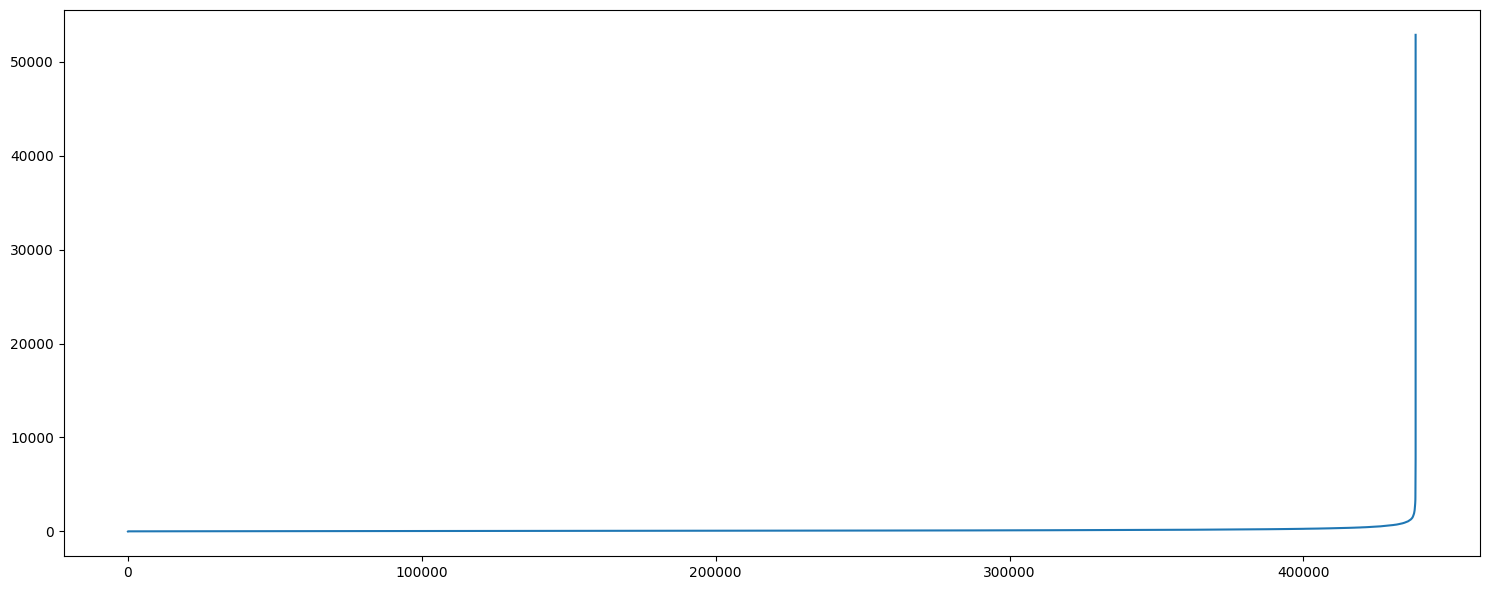

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sorted_dur = basic['dur_inhospital'].sort_values()
plt.figure(figsize=(15, 6))
plt.plot(sorted_dur.values)
plt.tight_layout()
# plt.savefig('histogram_grouped_by_50.png')  # 그래프 저장
plt.show()

In [34]:
basic.describe()

,dur_inhospital
count,437747.000000
mean,118.670392
std,183.696126
min,0.000000
25%,29.000000
50%,70.000000
75%,136.000000
max,7103.000000


In [55]:
sorted_dur.shape

(437747,)

In [14]:
sorted_dur[sorted_dur>297]

103217      297.002222
277555      297.002778
287516      297.004167
295369      297.007222
61245       297.010278
              ...     
237450     5992.040556
188072     7103.734722
43923      7733.944444
205100     9039.257500
33671     52893.796944
Name: dur_inhospital, Length: 33513, dtype: float64

In [15]:
# IQR 계산
Q1 = sorted_dur.quantile(0.25)  # 1사분위수 (25%)
Q3 = sorted_dur.quantile(0.75)  # 3사분위수 (75%)
IQR = Q3 - Q1

# 이상치 기준 계산
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치 확인
outliers = sorted_dur[(sorted_dur < lower_bound) | (sorted_dur > upper_bound)]

print(f"이상치 기준: 하한({lower_bound}), 상한({upper_bound})")
print("이상치 데이터:")
print(outliers)

이상치 기준: 하한(-130.5773611111111), 상한(297.9859722222222)
이상치 데이터:
26494       297.986667
27812       297.988889
35883       297.989444
35884       297.989444
343815      298.009722
              ...     
237450     5992.040556
188072     7103.734722
43923      7733.944444
205100     9039.257500
33671     52893.796944
Name: dur_inhospital, Length: 33403, dtype: float64


In [16]:
basic.describe()

,subject_id,hadm_id,hospital_expire_flag,admittime_year,calculated_age,los,dur_icu,dur_ed,dur_inhospital,time_diff
count,4.381730e+05,4.381730e+05,438173.000000,438173.000000,438173.000000,73181.000000,73181.000000,303787.000000,438173.000000,328685.000000
mean,1.500812e+07,2.500267e+07,0.022758,2154.639672,58.872587,3.451931,82.846338,10.141477,119.986013,3.496445
std,2.878016e+06,2.887959e+06,0.149132,24.003151,19.173195,4.922840,118.148156,8.794610,201.659550,5.953699
min,1.000003e+07,2.000002e+07,0.000000,2105.000000,18.000000,0.001250,0.030000,-18.733333,-7.733056,0.000000
25%,1.251474e+07,2.250126e+07,0.000000,2135.000000,45.000000,1.084225,26.021389,5.066667,30.133889,1.000000
50%,1.501373e+07,2.500676e+07,0.000000,2155.000000,60.000000,1.926782,46.242778,7.433333,71.074444,2.000000
75%,1.749757e+07,2.750384e+07,0.000000,2175.000000,74.000000,3.713322,89.119722,11.866667,137.274722,4.000000
max,1.999999e+07,2.999993e+07,1.000000,2212.000000,103.000000,110.232280,2645.574722,200.533333,52893.796944,320.000000


In [ ]:
basic['dur_inhospital'] = basic['dur_inhospital'].astype(int)

In [24]:
c= basic[(basic['dur_inhospital']>0) & (basic['dur_inhospital']<297)]
c.shape

(404659, 24)

In [23]:
d= basic[(basic['dur_inhospital']>0) & (basic['dur_inhospital']<=168)]
d.shape

(356345, 24)

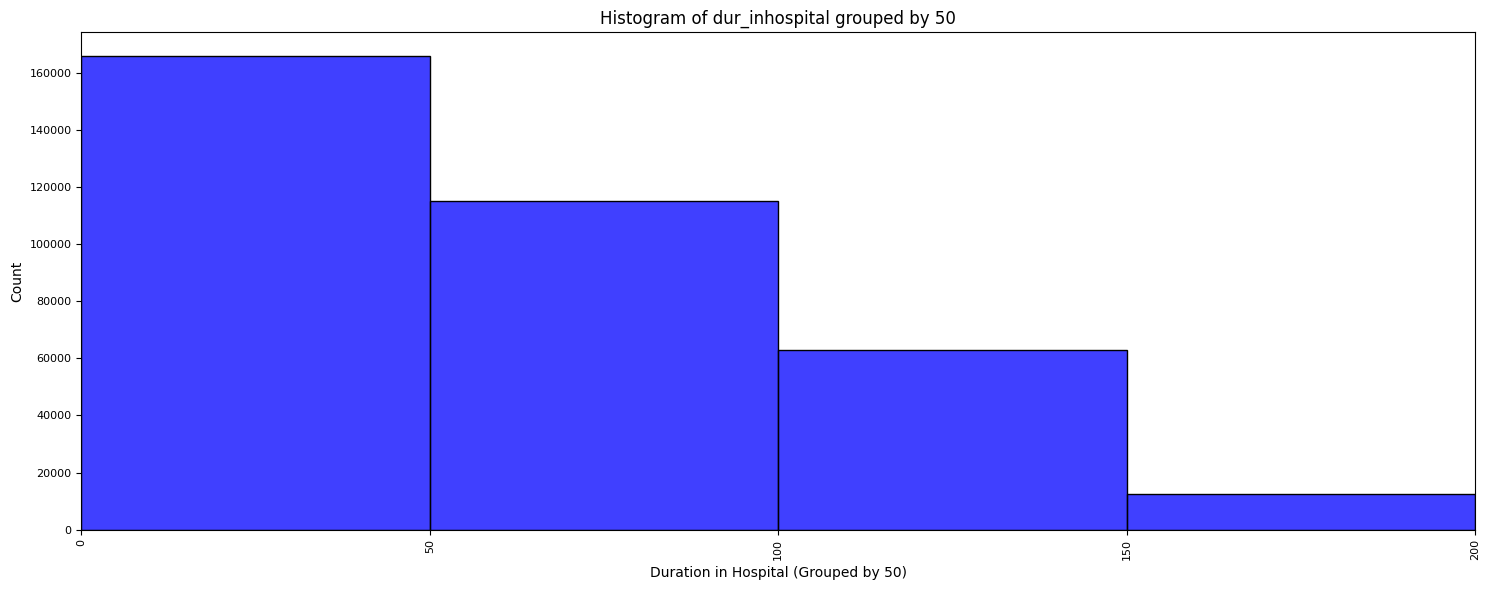

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 예제 DataFrame 생성
# basic = pd.DataFrame({'dur_inhospital': [값들]})

# 1. 50 단위로 구간 설정
bins = range(0, int(d['dur_inhospital'].max()) + 50, 50)  # 0부터 최대값까지 50 단위로 구간 생성

# 2. 히스토그램 그리기 (Seaborn 사용)
plt.figure(figsize=(15, 6))
sns.histplot(data=d, x='dur_inhospital', bins=bins, kde=False, color='blue', edgecolor='black')
plt.title('Histogram of dur_inhospital grouped by 50')
plt.xlabel('Duration in Hospital (Grouped by 50)')
plt.ylabel('Count')
plt.yticks(fontsize=8)
plt.xlim([0, 100])
plt.xticks(bins, rotation=90, fontsize=8)  # x축 레이블을 구간에 맞게 표시
plt.tight_layout()
# plt.savefig('histogram_grouped_by_50.png')  # 그래프 저장
plt.show()



## feature 그룹화

In [4]:
path = '/opt/workspace/data/MIMIC/Preprocessed_Data2'

In [5]:
lab = pd.read_csv(f'{path}/labevents_value.csv')
chart = pd.read_csv(f'{path}/chartevents.csv')
out = pd.read_csv(f'{path}/outputevents.csv')

In [16]:
lab['unique_label'].unique().shape

(530,)

In [11]:
lab[lab['unique_label']=="CD3"]

,subject_id,hadm_id,date_hour,unique_label,value
9504639,12557139,26168205.0,2155-10-23 09:00:00,CD3,86.0
19269468,15170707,26395964.0,2164-07-12 17:00:00,CD3,85.0
30591663,18195731,24247816.0,2113-01-14 17:00:00,CD3,95.0


In [12]:
lab[lab['unique_label']=="CD3 %"]

,subject_id,hadm_id,date_hour,unique_label,value
230979,10065767,20620437.0,2122-01-25 09:00:00,CD3 %,64.50
328798,10097232,29230076.0,2170-08-06 09:00:00,CD3 %,67.70
1838799,10516278,26767142.0,2163-06-16 08:00:00,CD3 %,40.60
1839265,10516278,28143198.0,2164-09-10 11:00:00,CD3 %,86.50
2017347,10565510,20703742.0,2172-09-08 11:00:00,CD3 %,0.20
...,...,...,...,...,...
36067895,19664531,29953754.0,2138-05-27 11:00:00,CD3 %,80.22
37062406,19930120,23731549.0,2179-09-09 15:00:00,CD3 %,90.10
37329478,19999784,21739106.0,2119-09-05 14:00:00,CD3 %,93.58
37331994,19999784,29234099.0,2119-12-05 13:00:00,CD3 %,90.83


In [13]:
lab[lab['unique_label']=="CD3 Absolute Count"]

,subject_id,hadm_id,date_hour,unique_label,value
230980,10065767,20620437.0,2122-01-25 09:00:00,CD3 Absolute Count,771.00
328799,10097232,29230076.0,2170-08-06 09:00:00,CD3 Absolute Count,372.00
1838800,10516278,26767142.0,2163-06-16 08:00:00,CD3 Absolute Count,1243.00
1839266,10516278,28143198.0,2164-09-10 11:00:00,CD3 Absolute Count,914.00
2017348,10565510,20703742.0,2172-09-08 11:00:00,CD3 Absolute Count,2.00
...,...,...,...,...,...
36067896,19664531,29953754.0,2138-05-27 11:00:00,CD3 Absolute Count,811.83
37062407,19930120,23731549.0,2179-09-09 15:00:00,CD3 Absolute Count,237.86
37329479,19999784,21739106.0,2119-09-05 14:00:00,CD3 Absolute Count,758.00
37331995,19999784,29234099.0,2119-12-05 13:00:00,CD3 Absolute Count,956.44


In [5]:
icu_stay = pd.read_csv(gzip.open(f'{icu_path}/icustays.csv.gz'))
admission = pd.read_csv(gzip.open(f'{hosp_path}/admissions.csv.gz'))
patients = pd.read_csv(gzip.open(f'{hosp_path}/patients.csv.gz'))

In [9]:
admission[(admission['subject_id'] == 11042406) & (admission['hadm_id'] == 20609236)]

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admit_provider_id,admission_location,discharge_location,insurance,language,marital_status,race,edregtime,edouttime,hospital_expire_flag
43849,11042406,20609236,2131-01-31 15:08:00,2131-01-31 03:11:00,2131-01-31 03:11:00,EW EMER.,P3529J,EMERGENCY ROOM,DIED,Medicare,ENGLISH,SINGLE,WHITE,2131-01-31 10:51:00,2131-01-31 16:03:00,1


### 데이터셋 요소 확인

In [31]:
d_items = pd.read_csv(gzip.open(f'{icu_path}/d_items.csv.gz'))

In [33]:
d_items=d_items.loc[d_items["linksto"]=='outputevents', :]
outputevents = pd.read_csv(gzip.open(f'{icu_path}/outputevents.csv.gz'), low_memory=False)
inputevents = pd.read_csv(gzip.open(f'{icu_path}/inputevents.csv.gz'), low_memory=False)

In [35]:
outputevents = pd.merge(outputevents, d_items[['itemid', 'label']], on=['itemid'], how='left')
# inputevents = pd.merge(inputevents, d_items[['itemid', 'label']], on=['itemid'], how='left')

In [ ]:
d_items=d_items.loc[(d_items["linksto"]=='chartevents'), :] # apache 값들 제거
chartevent_csv = gzip.open(f'{icu_path}/chartevents.csv.gz')
chartevent_result = pd.DataFrame()
cols = ['subject_id', 'hadm_id', 'storetime', 'itemid', 'valuenum']

for cnt, df in enumerate(pd.read_csv(chartevent_csv, chunksize=1e7, usecols=cols, low_memory=False)):
    print(f"{cnt+1} chunk is added in chartevent.csv")
    df.dropna(subset=['valuenum'], inplace=True)
    
    df = pd.merge(df, d_items[['itemid', 'label', 'category']], on=['itemid'], how='left')            
    df.dropna(subset=['itemid', "label"], inplace=True)
    a=df[df['label'].str.contains("ZVancomycin")]
    if not a.empty:
        print(df[df['label'].str.contains("ZVancomycin")])
    

In [38]:
path = '/opt/workspace/'

In [39]:
sbj_info_columns = pd.read_csv(f"{path}/sbj_info_columns.csv")

In [40]:
sbj_info_columns.head()

,unique_id,subject_id,hadm_id,time,location,calculated_age,gender,anchor_year_group,mortality,Height,...,Vital Cap,Vti High,Yawning,Yawning (COWS),pH,unique_id.1,inhospital_time,Vancomycin,Tobramycin,Gentamicin
0,10000032_22841357,27,27,27,27,27,27,27,27,27,...,0.0,0.0,0.0,0.0,0.0,27,27,NaN,NaN,NaN
1,10000032_25742920,45,45,45,45,45,45,45,45,45,...,0.0,0.0,0.0,0.0,0.0,45,45,NaN,NaN,NaN
2,10000032_29079034,60,60,60,60,60,60,60,60,60,...,0.0,0.0,0.0,0.0,0.0,60,60,NaN,NaN,NaN
3,10000084_23052089,114,114,114,114,114,114,114,114,114,...,0.0,0.0,0.0,0.0,0.0,114,114,NaN,NaN,NaN
4,10000117_27988844,80,80,80,80,80,80,80,80,80,...,0.0,0.0,0.0,0.0,0.0,80,80,NaN,NaN,NaN


In [ ]:
x_values = a.columns  # Column names for x-axis
y_values = a.iloc[1, :]  # Values for the corresponding row

# Create the scatter plot
plt.figure(figsize=(12,4))
for i in range(a.shape[0]):
    y_values = a.iloc[i, :]  # Values for the corresponding row
    plt.scatter(x_values, y_values, s=2)
    
plt.xticks(rotation=90)  # Rotate x-axis labels if necessary
plt.xlabel("Features")
plt.ylabel("Values")
plt.title("Scatter Plot of Selected Columns")
plt.show()

In [19]:
# sbj_info_columns = sbj_info_columns.drop(columns=['Vancomycin', 'Tobramycin', 'Gentamicin'])
for sbj in sbj_info_columns['unique_id']:
   a = sbj_info_columns[sbj_info_columns['unique_id']==sbj]
   if [col for col in a.columns if (int(a[col])<int(a['inhospital_time']) and int(a[col])!=0) and col not in ['subject_id', 'Vancomycin', 'Tobramycin', 'Gentamicin']] != []:
       print(sbj, [col for col in a.columns if (int(a[col])<int(a['inhospital_time']) and int(a[col])!=0) and col not in ['subject_id', 'Vancomycin', 'Tobramycin', 'Gentamicin']])
    

10000032_29079034 ['Void', 'Anion Gap', 'BUN', 'Calcium nonionized', 'Chloride', 'Creatinine', 'GCS Eye Opening', 'GCS Motor Response', 'GCS Verbal Response', 'Glucose', 'HCO3 (serum)', 'Heart Rate', 'Magnesium', 'Non Invasive Blood Pressure mean', 'O2 Flow', 'O2 saturation pulseoxymetry', 'Orientation to Person', 'Orientation to Place', 'Orientation to Time', 'Phosphorous', 'Potassium', 'Potassium, Whole Blood', 'Respiratory Rate', 'Sodium', 'Strength L Arm', 'Strength L Leg', 'Strength R Arm', 'Strength R Leg', 'Temperature Celsius']
10000980_26913865 ['Cefepime', 'Vancomycin_x', 'Ceftriaxone', 'Levofloxacin', 'Furosemide (Lasix)', 'Heparin Sodium', 'Ranitidine (Prophylaxis)', 'Foley', 'PreAdmission', 'Apnea Interval', 'Blood Transfusion Consent', 'CK (CPK)', 'CKMB', 'Called Out', 'Eye Care', 'GCS Eye Opening', 'GCS Motor Response', 'GCS Verbal Response', 'Glucose finger stick (range 70100)', 'Heart Rate', 'ICU Consent Signed', 'Inspiratory Time', 'Inspired O2 Fraction', 'Lactic Acid

KeyboardInterrupt: 

In [38]:
chart  = d_items.loc[(d_items["linksto"]=='chartevents'), :]
outputs  = d_items.loc[(d_items["linksto"]=='outputevents'), :]
inputs  = d_items.loc[(d_items["linksto"]=='inputevents'), :]


In [44]:
Counter(d_items['param_type'])

Counter({'Text': 1877,
         'Numeric': 782,
         'Solution': 474,
         'Checkbox': 356,
         'Date and time': 189,
         'Processes': 169,
         'Ingredient': 125,
         'Numeric with tag': 42})

In [43]:
chart[chart['label'].str.contains("Vancomycin", na=False)]

,itemid,label,abbreviation,linksto,category,unitname,param_type,lownormalvalue,highnormalvalue
1452,225697,ZVancomycin (Peak),ZVancomycin (Peak),chartevents,Labs,None,Numeric,NaN,NaN
1741,226064,ZVancomycin (Trough),ZVancomycin (Trough),chartevents,Labs,None,Numeric,NaN,NaN
1742,226065,ZVancomycin (Random),ZVancomycin (Random),chartevents,Labs,None,Numeric,NaN,NaN
2214,227453,Vancomycin (Peak),Vancomycin (Peak),chartevents,Labs,None,Numeric with tag,NaN,NaN
2215,227454,Vancomycin (Random),Vancomycin (Random),chartevents,Labs,None,Numeric with tag,NaN,NaN
2216,227455,Vancomycin (Trough),Vancomycin (Trough),chartevents,Labs,None,Numeric with tag,NaN,NaN


In [29]:
sbj_info_columns[sbj_info_columns.loc[:, (sbj_info_columns != 0).any()].columns]

,unique_id,Height,Weight,BPs,BPd,Cefepime,Vancomycin_x,Ceftriaxone,Levofloxacin,Furosemide (Lasix),...,Visual Disturbances,Vital Cap,Vti High,Yawning,Yawning (COWS),pH,inhospital_time,Vancomycin,Tobramycin,Gentamicin
0,10000032_22841357,0,0,0,0,27,27.0,27,27,27,...,27.0,27.0,27.0,27.0,27.0,27.0,27,NaN,NaN,NaN
1,10000032_25742920,0,0,0,0,45,45.0,45,45,45,...,45.0,45.0,45.0,45.0,45.0,45.0,45,NaN,NaN,NaN
2,10000032_29079034,0,0,0,0,60,60.0,60,60,60,...,60.0,60.0,60.0,60.0,60.0,60.0,60,NaN,NaN,NaN
3,10000084_23052089,0,0,0,0,114,114.0,114,114,114,...,114.0,114.0,114.0,114.0,114.0,114.0,114,NaN,NaN,NaN
4,10000117_27988844,0,0,0,0,80,80.0,80,80,80,...,80.0,80.0,80.0,80.0,80.0,80.0,80,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357083,11168722_29693667,0,0,0,0,104,104.0,104,104,104,...,104.0,104.0,104.0,104.0,104.0,104.0,104,NaN,NaN,NaN
357084,11168746_27653172,0,0,0,0,151,151.0,151,151,151,...,151.0,151.0,151.0,151.0,151.0,151.0,151,NaN,NaN,NaN
357085,11168764_20630105,0,0,0,0,44,44.0,44,44,44,...,44.0,44.0,44.0,44.0,44.0,44.0,44,NaN,NaN,NaN
357086,11169005_21030537,0,0,0,0,41,41.0,41,41,41,...,41.0,41.0,41.0,41.0,41.0,41.0,41,NaN,NaN,NaN


In [2]:
dataset1 = pd.read_csv("/opt/workspace/data/MIMIC/Preprocessed_Data2/sequence/sequence_10.csv")
dataset1.head()

,subject_id,hadm_id,time,location,calculated_age,gender,anchor_year_group,mortality,Height,Weight,...,Ventilator Mode,Ventilator Mode (Hamilton),Ventilator Tank,Ventilator Type,Visual Disturbances,Vital Cap,Vti High,Yawning,Yawning (COWS),pH
0,11169203,21564926,2118-09-11 00:00:00,36,70,F,2008 - 2010,1,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11169203,21564926,2118-09-11 01:00:00,36,70,F,2008 - 2010,1,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11169203,21564926,2118-09-11 02:00:00,36,70,F,2008 - 2010,1,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11169203,21564926,2118-09-11 03:00:00,36,70,F,2008 - 2010,1,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11169203,21564926,2118-09-11 04:00:00,36,70,F,2008 - 2010,1,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
col = ['Absolute Count', 'ACDA Citrate', 'Activity / Mobility', "Amiodarone", 'Anderson', 'Arctic Sun', 'Arterial', 'Bilirubin', 'BiPap', "Calcium Gluconate", "Cardiac Output", "Central Venous",
       "Chloride", "Cholesterol", "CKMB", "Creatinine", "Daily", "Differential", "Digoxin",  "Epinephrine", 'Estimated', 'ETT', 'Fentanyl', 'Furosemide (Lasix)', 'Gentamicin', 'Glucose',
       'Goose', 'GU Irrigant', 'Hematocrit', 'Heparin Sodium', 'HM II', 'Insulin', 'JP ', 'KCL', 'Magnesium Sulfate', 'Nausea and Vomiting', 'Nicardipine', 'Nitric Oxide', 'O2 Flow', 'OCAT',
       'Orientation', 'Orthostatic BP', 'Orthostatic HR', 'P ', 'PAR', 'Pericardial', 'Phenylephrine', 'Phenytoin', 'Pinsp', 'Piperacillin', 'Potassium', 'Procan', 'Resistance',
       'Respiratory Rate', 'Restlessness', 'ScvO2', 'Sodium', 'Spont', 'Strength', 'Sweating', 'T ', 'TCO2', 'TF Residual', 'Tidal Volume', 'Tobramycin', 'Transpulmonary Pressure', 'Tremor',
       'VAD Beat Rate', 'Ventilator Mode', 'Ventilator', 'Yawning']
for c in col:
    
    b = dataset1.dropna(subset=[a for a in dataset1.columns if c in a])
    print(b.loc[:, [a for a in dataset1.columns if c in a]])

        Absolute Count Basos  Absolute Count Eos  Absolute Count Lymphs  \
1857                    0.00                0.00                   2.33   
2025                    0.00                0.00                   2.33   
5964                    0.02                0.01                   2.40   
6334                    0.02                0.00                   0.85   
6557                    0.01                0.08                   1.65   
...                      ...                 ...                    ...   
403014                  0.02                0.09                   1.46   
406110                  0.10                0.25                   1.40   
408913                  0.02                0.27                   0.73   
416151                  0.03                0.07                   1.55   
416943                  0.01                0.07                   1.93   

        Absolute Count Monos  Absolute Count Neuts  
1857                    0.41                 1

In [13]:
dataset1 = pd.read_csv("/opt/workspace/data/MIMIC/Preprocessed_Data/sequence2/sequence_10.csv")
dataset1.head()

,subject_id,hadm_id,time,location,calculated_age,gender,anchor_year_group,mortality,Height,Weight,...,Ventilator Mode,Ventilator Mode (Hamilton),Ventilator Tank,Ventilator Type,Visual Disturbances,Vital Cap,Vti High,Yawning,Yawning (COWS),pH
0,11169203,21564926,2118-09-11 00:00:00,36,70,F,2008 - 2010,1,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11169203,21564926,2118-09-11 01:00:00,36,70,F,2008 - 2010,1,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11169203,21564926,2118-09-11 02:00:00,36,70,F,2008 - 2010,1,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11169203,21564926,2118-09-11 03:00:00,36,70,F,2008 - 2010,1,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11169203,21564926,2118-09-11 04:00:00,36,70,F,2008 - 2010,1,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
dataset1['unique_id']=dataset1['subject_id'].astype(str) + "_" + dataset1['hadm_id'].astype(str)

In [18]:
dataset1[dataset1[['Vancomycin_x', 'Vancomycin_y']].notnull().any(axis=1)][['Vancomycin_x', 'Vancomycin_y']]

,Vancomycin_x,Vancomycin_y
206,1.0,NaN
229,1.0,NaN
4079,1.0,NaN
4091,1.0,NaN
5374,1.0,NaN
...,...,...
420256,NaN,15.5
420258,1.0,12.8
420265,1.0,NaN
420963,1.0,NaN


In [28]:
def sliding_window_generator(df, window_size=10, stride=5):
    """
    DataFrame에서 슬라이딩 윈도우를 한 번에 하나씩 반환하는 generator.

    Parameters:
        df (pd.DataFrame): 입력 데이터
        window_size (int): 슬라이딩 윈도우 크기
        stride (int): 윈도우 이동 간격

    Yields:
        pd.DataFrame: 개별 슬라이딩 윈도우
    """
    df['time'] = pd.to_datetime(df['time'])
    df = df.sort_values("time")
    for start in range(0, len(df) - window_size + 1, stride):
        window = df.iloc[start:start + window_size, 3:].copy().to_numpy()
        # window['window_id'] = start // stride  # 윈도우 ID 추가
        yield window

In [29]:
ids = ['11200955_22236736', '11204623_21976035', '11255143_28465219', '11181695_28945331', '11266689_27477158', '11170490_23891408', '11217325_20543420']
window_gens= [0 for _ in range(len(ids))]
for i, id in enumerate(ids):
    dataset = dataset1[dataset1['unique_id']==id]

    # 슬라이딩 윈도우 생성
    window_gens[i] = sliding_window_generator(dataset, window_size=10, stride=5)


batch_size=10
batch = []
for _ in range(batch_size):
    for gen in window_gens:
        try:
            # 각 generator에서 한 윈도우 가져오기
            batch.append(next(gen))
        except StopIteration:
            # generator가 끝난 경우 넘어감
            continue

/tmp/ipykernel_2649773/1367381098.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time'] = pd.to_datetime(df['time'])
/tmp/ipykernel_2649773/1367381098.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time'] = pd.to_datetime(df['time'])
/tmp/ipykernel_2649773/1367381098.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

In [30]:
batch[0]

array([[17, 51, 'M', ..., nan, nan, '11200955_22236736'],
       [0, 51, 'M', ..., nan, nan, '11200955_22236736'],
       [0, 51, 'M', ..., nan, nan, '11200955_22236736'],
       ...,
       [0, 51, 'M', ..., nan, nan, '11200955_22236736'],
       [0, 51, 'M', ..., nan, nan, '11200955_22236736'],
       [0, 51, 'M', ..., nan, nan, '11200955_22236736']], dtype=object)

In [4]:
icd=pd.read_csv('/opt/workspace/data/MIMIC/Preprocessed_Data/unique_ICD(myocardial_infarction,COPD,diabetes,hypertension,stroke,dyslipidemia,stomach_cancer,colon_cancer,liver_cancer,lung_cancer).csv')
icd = icd.drop(columns='index')
icd.head()

,subject_id,hadm_id,icd_code,long_title
0,10000084,23052089,5,"Hyperlipidemia, unspecified"
1,10000084,29888819,5,"Hyperlipidemia, unspecified"
2,10000980,20897796,3,Hypertensive heart and chronic kidney disease ...
3,10000980,25911675,2,Type 2 diabetes mellitus with unspecified comp...
4,10000980,29659838,2,Type 2 diabetes mellitus with diabetic nephrop...


In [5]:
df = pd.merge(dataset1, icd, on=['subject_id', 'hadm_id'])

In [2]:

icd=pd.read_csv('/opt/workspace/data/MIMIC/Preprocessed_Data/unique_ICD(myocardial_infarction,COPD,diabetes,hypertension,stroke,dyslipidemia,stomach_cancer,colon_cancer,liver_cancer,lung_cancer).csv')
icd = icd.drop(columns='index')

total_people=[[0, [0 for _ in range(563)]] for _ in range(10)]
for seq in range(88):
    dataset1 = pd.read_csv(f"/opt/workspace/data/MIMIC/Preprocessed_Data/sequence/sequence_{seq}.csv")
    dataset1['unique_id']=dataset1['subject_id'].astype(str) + "_" + dataset1['hadm_id'].astype(str)
    df = pd.merge(dataset1, icd, on=['subject_id', 'hadm_id'])
    print(f"seq {seq}", end=" ")
    for i in range(10):
        icd_df = df[df['icd_code']==i]
        print(i, len(icd_df['unique_id'].unique()))
        
        ids=icd_df['unique_id'].unique()
        
        if icd_df['unique_id'].unique().size == 0:  # 데이터가 없는 경우 건너뜀
            continue
        
        total_people[i][0]+=len(icd_df['unique_id'].unique())
        
        for id in ids:
            a = icd_df[icd_df['unique_id']==id].isnull().sum()
            result_vector = (a == icd_df[icd_df['unique_id'] == id].shape[0]).astype(int).tolist()
            total_people[i][1] = [x + y for x, y in zip(total_people[i][1], result_vector)]

        

seq 0 0 48
1 63
2 163
3 330
4 49
5 55
6 4
7 14
8 12
9 20
seq 1 0 71
1 37
2 166
3 343
4 42
5 54
6 3
7 9
8 22
9 29
seq 2 0 61
1 32
2 170
3 364
4 44
5 62
6 4
7 15
8 16
9 12
seq 3 0 63
1 56
2 126
3 324
4 55
5 74
6 3
7 17
8 10
9 12
seq 4 0 54
1 74
2 179
3 363
4 52
5 58
6 2
7 4
8 6
9 19
seq 5 0 55
1 34
2 195
3 367
4 52
5 52
6 0
7 13
8 22
9 20
seq 6 0 56
1 27
2 166
3 286
4 50
5 64
6 1
7 5
8 25
9 8
seq 7 0 55
1 25
2 124
3 355
4 46
5 75
6 2
7 3
8 11
9 24
seq 8 0 72
1 50
2 140
3 303
4 40
5 67
6 2
7 28
8 9
9 14
seq 9 0 57
1 36
2 133
3 332
4 44
5 65
6 10
7 6
8 25
9 15
seq 10 0 51
1 43
2 146
3 354
4 53
5 74
6 2
7 8
8 11
9 26
seq 11 0 58
1 32
2 157
3 304
4 53
5 54
6 0
7 14
8 19
9 14
seq 12 0 47
1 28
2 148
3 336
4 46
5 60
6 5
7 4
8 24
9 19
seq 13 0 60
1 44
2 146
3 388
4 44
5 63
6 5
7 4
8 9
9 11
seq 14 0 56
1 41
2 152
3 323
4 57
5 64
6 7
7 13
8 13
9 36
seq 15 0 65
1 47
2 151
3 340
4 41
5 50
6 1
7 25
8 16
9 19
seq 16 0 53
1 34
2 148
3 331
4 54
5 44
6 2
7 2
8 15
9 19
seq 17 0 58
1 30
2 146
3 358
4 56
5 

In [ ]:
disease= ['myocardial_infarction', 'COPD', 'diabetes',
                'hypertension', 'stroke', 'dyslipidemia', 
                'stomach_cancer', 'colon_cancer', 
                'liver_cancer', 'lung_cancer'
                ] 
for i in range(10):
    a=total_people[i][1]
    # print(total_people[i][0])
    
    plt.figure(figsize=(16,4))
    plt.bar(range(len(a)), a)
    plt.title(f"{disease[i]}: {total_people[i][0]}")
    # plt.xticks(rotation=90, fontsize=2)
    plt.show()
    

In [4]:

icd=pd.read_csv('/opt/workspace/data/MIMIC/Preprocessed_Data/unique_ICD(myocardial_infarction,COPD,diabetes,hypertension,stroke,dyslipidemia,stomach_cancer,colon_cancer,liver_cancer,lung_cancer).csv')
icd = icd.drop(columns='index')

total_people=[[0, [0 for _ in range(563)]] for _ in range(10)]
for seq in range(88):
    dataset1 = pd.read_csv(f"/opt/workspace/data/MIMIC/Preprocessed_Data/sequence/sequence_{seq}.csv")
    dataset1['unique_id']=dataset1['subject_id'].astype(str) + "_" + dataset1['hadm_id'].astype(str)
    df = pd.merge(dataset1, icd, on=['subject_id', 'hadm_id'])
    print(f"seq {seq}", end=" ")
    for i in range(10):
        icd_df = df[df['icd_code']==i]
        print(i, len(icd_df['unique_id'].unique()))
        
        ids=icd_df['unique_id'].unique()
        
        if icd_df['unique_id'].unique().size == 0:  # 데이터가 없는 경우 건너뜀
            continue
        
        total_people[i][0]+=len(icd_df['unique_id'].unique())
        
        for id in ids:
            a = icd_df[icd_df['unique_id']==id].notnull().sum()
            result_vector = (a != 0).astype(int).tolist()
            total_people[i][1] = [x + y for x, y in zip(total_people[i][1], result_vector)]

        

seq 0 0 48
1 63
2 163
3 330
4 49
5 55
6 4
7 14
8 12
9 20
seq 1 0 71
1 37
2 166
3 343
4 42
5 54
6 3
7 9
8 22
9 29
seq 2 0 61
1 32
2 170
3 364
4 44
5 62
6 4
7 15
8 16
9 12
seq 3 0 63
1 56
2 126
3 324
4 55
5 74
6 3
7 17
8 10
9 12
seq 4 0 54
1 74
2 179
3 363
4 52
5 58
6 2
7 4
8 6
9 19
seq 5 0 55
1 34
2 195
3 367
4 52
5 52
6 0
7 13
8 22
9 20
seq 6 0 56
1 27
2 166
3 286
4 50
5 64
6 1
7 5
8 25
9 8
seq 7 0 55
1 25
2 124
3 355
4 46
5 75
6 2
7 3
8 11
9 24
seq 8 0 72
1 50
2 140
3 303
4 40
5 67
6 2
7 28
8 9
9 14
seq 9 0 57
1 36
2 133
3 332
4 44
5 65
6 10
7 6
8 25
9 15
seq 10 0 51
1 43
2 146
3 354
4 53
5 74
6 2
7 8
8 11
9 26
seq 11 0 58
1 32
2 157
3 304
4 53
5 54
6 0
7 14
8 19
9 14
seq 12 0 47
1 28
2 148
3 336
4 46
5 60
6 5
7 4
8 24
9 19
seq 13 0 60
1 44
2 146
3 388
4 44
5 63
6 5
7 4
8 9
9 11
seq 14 0 56
1 41
2 152
3 323
4 57
5 64
6 7
7 13
8 13
9 36
seq 15 0 65
1 47
2 151
3 340
4 41
5 50
6 1
7 25
8 16
9 19
seq 16 0 53
1 34
2 148
3 331
4 54
5 44
6 2
7 2
8 15
9 19
seq 17 0 58
1 30
2 146
3 358
4 56
5 

In [ ]:
disease= ['myocardial_infarction', 'COPD', 'diabetes',
                'hypertension', 'stroke', 'dyslipidemia', 
                'stomach_cancer', 'colon_cancer', 
                'liver_cancer', 'lung_cancer'
                ] 
for i in range(10):
    a=total_people[i][1]
    # print(total_people[i][0])
    
    plt.figure(figsize=(16,4))
    plt.bar(range(len(a)), a)
    plt.title(f"{disease[i]}: {total_people[i][0]}")
    # plt.xticks(rotation=90, fontsize=2)
    plt.show()
    

In [3]:
def find_icd(data_root, data, domain_group):
    print(f"Select related ICD-10 ")
    
    sheet_name=domain_group  
    
    icd_prefix = [pd.read_excel(f"{data_root}/icd_diagnoses.xlsx", sheet_name=s_name)["icd_code"].str[:3].unique() for s_name in sheet_name]
    data=data[data['seq_num']<=5] # 5
    
    total_df=pd.DataFrame([])
    for i, prefixes in enumerate(icd_prefix):       
        df=pd.concat([data[data["icd_code"].str.contains(prefix)] for prefix in prefixes])
        df['icd_code'] = i # df['icd_code'].apply(lambda x: f"{i}_{x}" if pd.notnull(x) else x) # i # domain 별로 icd relabeling
        df.reset_index(drop=True, inplace=True)
        df=df.drop_duplicates(subset=['subject_id', 'hadm_id'])
        print(f"{sheet_name[i]} disease subject: {df.shape[0]}")
        
        df["unique_id"] = df[["subject_id", "hadm_id"]].apply(lambda row: '_'.join(row.astype(str)), axis=1)
        total_df=pd.concat([total_df, df], axis=0)
    
    # global filtering based on minimum 'seq_num' for each unique_id
    total_df.reset_index(inplace=True) # reset index안하면 중복 index 존재
    total_df = total_df.loc[total_df.groupby("unique_id")["seq_num"].idxmin()]
    
    # SUBJECT는 확인용
    SUBJECT={}
    for i in range(len(domain_group)):
        SUBJECT[sheet_name[i]] = list(set(total_df.loc[total_df["icd_code"]==i, 'unique_id']))
        
    total_df = total_df.drop(columns=['seq_num', 'unique_id'])

    print(f"Total subject: {total_df.shape[0]}")
    return total_df
    

In [ ]:
disease = ['myocardial_infarction', 'COPD', 'diabetes', 'hypertension', 'stroke']
icd=pd.read_csv(f"/opt/workspace/data/MIMIC/Preprocessed_Data3/icd.csv", low_memory = False)

icd = find_icd(root_path, icd, disease)
icd = icd.drop(columns='index')


total_people=[[0, []] for _ in range(len(disease))]
for seq in range(88):
    dataset1 = pd.read_csv(f"/opt/workspace/data/MIMIC/Preprocessed_Data3/sequence/sequence_{seq}.csv")
    dataset1['unique_id']=dataset1['subject_id'].astype(str) + "_" + dataset1['hadm_id'].astype(str)
    dataset1 = dataset1.groupby('unique_id').median(numeric_only=True)
    
    df = pd.merge(dataset1, icd, on=['subject_id', 'hadm_id'])

    print(f"seq {seq}")
    for i in range(len(disease)):
        icd_df = df[df['icd_code']==i]
        # print(i, icd_df.shape)
        
        # icd_df.drop(columns=['subject_id', 'hadm_id', 'long_title'])
        # icd_df= icd_df.dropna(axis=1, how='all')
        non_na_columns = icd_df.apply(lambda row: row.dropna().index.tolist(), axis=1)

        total_people[i][1].extend(sum(non_na_columns, []))
        total_people[i][0]+= icd_df.shape[0]
        

total = pd.DataFrame([Counter(total_people[0][1]), Counter(total_people[1][1]), Counter(total_people[2][1]), Counter(total_people[3][1]), Counter(total_people[4][1])])
total.index = disease    
print(pd.DataFrame([Counter(total_people[0][0]), Counter(total_people[1][0]), Counter(total_people[2][0]), Counter(total_people[3][0]), Counter(total_people[4][0])]))

# 각 집합 생성
sets = [set(item[1]) for item in total_people[0:len(disease)]]

# 모든 집합의 공통 요소 찾기
common_elements = set.intersection(*sets)

# 각각의 집합에만 포함된 요소 찾기
unique_elements = [s - set.union(*(sets[:i] + sets[i+1:])) for i, s in enumerate(sets)]

# 결과 출력
print(f"공통 요소 {len(common_elements)}: {common_elements}")
for i, unique in enumerate(unique_elements):
    print(f"Set {i}의 고유 요소 {len(unique)}: {unique}")

total.to_csv(f"disease_info_{len(disease)}.csv")

Select related ICD-10 
myocardial_infarction disease subject: 5660
COPD disease subject: 4903
diabetes disease subject: 18914
hypertension disease subject: 39355
stroke disease subject: 4467
Total subject: 59379
seq 0
seq 1
seq 2


In [3]:
path='/opt/workspace/data/MIMIC/Preprocessed_Data3/'

### 심혈관 질환 데이터 생성

In [ ]:
disease = ['myocardial_infarction', 'hypertension', 'stroke']
icd=pd.read_csv(f"/opt/workspace/data/MIMIC/Preprocessed_Data3/icd.csv", low_memory = False)

icd = find_icd(root_path, icd, disease)
icd = icd.drop(columns='index')


total_people=[[0, []] for _ in range(len(disease))]
for seq in range(88):
    dataset1 = pd.read_csv(f"/opt/workspace/data/MIMIC/Preprocessed_Data3/sequence/sequence_{seq}.csv")
    dataset1['unique_id']=dataset1['subject_id'].astype(str) + "_" + dataset1['hadm_id'].astype(str)
    
    df = pd.merge(dataset1, icd, on=['subject_id', 'hadm_id'])

    print(f"seq {seq}")
    for i in range(len(disease)):
        icd_df = df[df['icd_code']==i]
    
        total_people[i][1].append(icd_df)
        total_people[i][0]+= icd_df.shape[0]

for i in range(len(disease)):
    total = pd.concat(total_people[i][1])
    total.to_csv(f"{path}/3Domain/{disease[i]}_{i}.csv", index=False)

In [20]:
#### null 90% 미만 selection
files = ['myocardial_infarction_0', 'hypertension_1', 'stroke_2']

below_90_columns = []
for file in files:
    disease_data = pd.read_csv(f"{path}/3Domain/{file}.csv")
    sbj_mean = disease_data.groupby('subject_id').median(numeric_only=True).reset_index()
    print(file, sbj_mean.shape[0])
    # print(sbj_mean.isnull().median())
    below_90 = sbj_mean.loc[:, sbj_mean.isnull().mean() < 0.9].columns
    below_90_columns.append(below_90)
    
    # plt.figure(figsize=(12,6))
    # plt.title(file)
    # plt.scatter(sbj_mean.isnull().mean().index, sbj_mean.isnull().mean().values, s=3)
    # plt.xticks(rotation=90, fontsize=5)
    # plt.show()

# 각 집합 생성
sets = [set(item) for item in below_90_columns]

# 모든 집합의 공통 요소 찾기
common_elements = set.intersection(*sets)

# 각각의 집합에만 포함된 요소 찾기
unique_elements = [s - set.union(*(sets[:i] + sets[i+1:])) for i, s in enumerate(sets)]

# 결과 출력
print(f"공통 요소 {len(common_elements)}: {common_elements}")
for i, unique in enumerate(unique_elements):
    print(f"Set {i}의 고유 요소 {len(unique)}: {unique}")


myocardial_infarction_0 4423
hypertension_1 23712
stroke_2 3960
공통 요소 47: {'location', 'icd_code', 'Chloride', 'PTT', 'Creatinine', 'Strength L Arm', 'HCO3 (serum)', 'Magnesium', 'GCS Motor Response', 'Respiratory Rate', 'O2 saturation pulseoxymetry', 'ICU_WBC', 'BUN', 'Calcium nonionized', 'Prothrombin time', 'Sodium', 'Height', 'BPd', 'Strength L Leg', 'Temperature Celsius', 'Activity / Mobility (JHHLM)', 'mortality', 'Non Invasive Blood Pressure mean', 'Hematocrit', 'Potassium', 'O2 Flow', 'pH', 'Glucose', 'Platelet Count', 'BPs', 'Strength R Arm', 'Foley', 'Current Dyspnea Assessment', 'hadm_id', 'calculated_age', 'Glucose finger stick (range 70100)', 'GCS Verbal Response', 'INR(PT)', 'Weight', 'Orientation', 'Phosphorous', 'Heart Rate', 'Hemoglobin', 'GCS Eye Opening', 'subject_id', 'Anion Gap', 'Strength R Leg'}
Set 0의 고유 요소 25: {'Fibrinogen, Functional', 'Ventilator Mode', 'Arterial O2 Saturation', 'Nitroglycerin', 'Mixed Venous O2% Sat', 'Fentanyl (Concentrate)', 'Insulin Humal

In [21]:
import pickle
with open(f'{path}/columns_each_csv.pkl', 'rb') as f:
    loaded_dict = pickle.load(f)

a =0 
b=0
c=0
d=0
e=[]
for elements in unique_elements:
    if elements in loaded_dict['chartevents']:
        print(f"chartevents {elements}: True")
        a+=1
    elif elements in loaded_dict['basic']:
        print(f"basic {elements}: True")
        b+=1            
    # elif elements in loaded_dict['labevents']:
    #     print(f"labevents {elements}: True")
    elif elements in loaded_dict['inputevents']:
        print(f"inputevents {elements}: True")
        c+=1
    elif elements in loaded_dict['outputevents']:
        print(f"outputevents {elements}: True")
        d+=1
    else:
        e.append(elements)

print(a,b,c,d, e)

0 0 0 0 [{'Fibrinogen, Functional', 'Ventilator Mode', 'Arterial O2 Saturation', 'Nitroglycerin', 'Mixed Venous O2% Sat', 'Fentanyl (Concentrate)', 'Insulin Humalog', 'Vancomycin_output_chart', 'Pulmonary Artery Pressure mean', 'Central Venous Pressure', 'Cefazolin', 'Norepinephrine', 'Calcium Gluconate', 'Cefepime', 'OR Urine', 'Chest Tube', 'Phenylephrine', 'Hematocrit (whole blood calc)', 'Cough/Deep Breath', 'CKMB fraction (%)', 'Insulin Glargine', 'Sodium, Whole Blood', 'Heparin Sodium', 'Chloride, Whole Blood', 'Incentive Spirometry'}, set(), {'Triglycerides', 'Cholesterol, LDL, Calculated', 'Cholesterol, Total', 'TF Residual', 'Famotidine (Pepcid)', 'Nicardipine', 'Cholesterol, HDL', 'Hydralazine', 'Serum Osmolality', 'Morphine Sulfate', 'Straight Cath', 'Labetalol', 'Levetiracetam (Keppra)'}]


In [22]:
# 심혈관 질환
[len(item) for item in below_90_columns]

[150, 47, 138]

In [23]:
#### t-test에 의해 selection
from scipy.stats import ttest_ind

files = ['myocardial_infarction_0', 'hypertension_1', 'stroke_2']

ttest_columns = []
for file in files:
    disease_data = pd.read_csv(f"{path}/3Domain/{file}.csv")
    sbj_mean = disease_data.groupby('subject_id').median(numeric_only=True).reset_index()
    
    select_df = sbj_mean[[c for c in sbj_mean if c not in ['subject_id', "hadm_id", 'icd_code']]]
    print(file, select_df.shape)
    # Separate features and labels
    X = select_df.drop(columns=['mortality'])
    y = select_df['mortality']

    # Perform t-tests
    selected_features = []
    p_values = []
    for feature in X.columns:
        # Split the feature values based on class
        group1 = X[y == 0][feature]
        group2 = X[y == 1][feature]

        # Perform t-test
        t_stat, p_value = ttest_ind(group1, group2, nan_policy='omit')
        p_values.append(p_value)

        # Select feature if p-value is below significance threshold (e.g., 0.05)
        if p_value < 0.05:
            selected_features.append(feature)

    print("\nSelected Features (p-value < 0.05):", selected_features)
    ttest_columns.append(selected_features)

# 각 집합 생성
sets = [set(item) for item in ttest_columns]

# 모든 집합의 공통 요소 찾기
common_elements2 = set.intersection(*sets)

# 각각의 집합에만 포함된 요소 찾기
unique_elements2 = [s - set.union(*(sets[:i] + sets[i+1:])) for i, s in enumerate(sets)]

# 결과 출력
print(f"공통 요소 {len(common_elements2)}: {common_elements2}")
for i, unique in enumerate(unique_elements2):
    print(f"Set {i}의 고유 요소 {len(unique)}: {unique}")


myocardial_infarction_0 (4423, 554)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:7030: RuntimeWarning: invalid value encountered in double_scalars
  svar = ((n1 - 1) * v1 + (n2 - 1) * v2) / df



Selected Features (p-value < 0.05): ['location', 'calculated_age', 'Height', 'Weight', 'Furosemide (Lasix)', 'Morphine Sulfate', 'Magnesium Sulfate (Bolus)', 'Lorazepam (Ativan)', 'Propofol', 'Dopamine', 'Fentanyl (Concentrate)', 'Nitroglycerin', 'Cefazolin', 'Insulin Regular', 'Insulin Glargine', 'Phenylephrine', 'Norepinephrine', 'Furosemide (Lasix) 250/50', 'Epinephrine', 'Vasopressin', 'Digoxin (Lanoxin)', 'Citrate', 'ACDA Citrate (1000ml)', 'Dexmedetomidine (Precedex)', 'Glycopyrolate (Robinul)', 'Phenylephrine (50/250)', 'Insulin Novolog', 'Chest Tube', 'Foley', 'Oral Gastric', 'PreAdmission', 'R Pleural', 'Rectal Tube', 'Straight Cath', 'TF Residual', 'Void', 'Activated Clotting Time', 'Activity / Mobility (JHHLM)', 'Activity / Mobility (RN Daily Mobility Goal)', 'Alanine Aminotransferase (ALT)', 'Albumin', 'Alkaline Phosphate', 'Amylase', 'Anion Gap', 'Arctic Sun Water Temp', 'Arterial Base Excess', 'Arterial Blood Pressure mean', 'Arterial CO2 Pressure', 'Arterial O2 Saturati

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:7030: RuntimeWarning: invalid value encountered in double_scalars
  svar = ((n1 - 1) * v1 + (n2 - 1) * v2) / df



Selected Features (p-value < 0.05): ['calculated_age', 'Height', 'Weight', 'Furosemide (Lasix)', 'AcetaminophenIV', 'Propofol', 'Fentanyl', 'Midazolam (Versed)', 'Nitroglycerin', 'Insulin Regular', 'Insulin Glargine', 'Phenylephrine', 'Norepinephrine', 'Furosemide (Lasix) 250/50', 'Epinephrine', 'Phenylephrine (50/250)', 'Clindamycin', 'Calcium Chloride', 'Clevidipine (Cleviprex)', 'Chest Tube', 'Condom Cath', 'Foley', 'Nasogastric', 'Oral Gastric', 'Straight Cath', 'Void', 'Activated Clotting Time', 'Activity / Mobility (JHHLM)', 'Activity / Mobility (RN Daily Mobility Goal)', 'Agitation', 'Alanine Aminotransferase (ALT)', 'Albumin', 'Alkaline Phosphate', 'Anion Gap', 'Arterial Blood Pressure mean', 'Asparate Aminotransferase (AST)', 'BUN', 'Basic Mobility (AMPAC)', 'BiPap EPAP', 'BiPap O2 Flow', 'Bilirubin, Direct', 'Bilirubin, Total', 'Brain Natiuretic Peptide (BNP)', 'CKMB fraction (%)', 'Calcium nonionized', 'Cardiac Output (CCO)', 'Cardiac Output (thermodilution)', 'Central Veno

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:7030: RuntimeWarning: invalid value encountered in double_scalars
  svar = ((n1 - 1) * v1 + (n2 - 1) * v2) / df



Selected Features (p-value < 0.05): ['location', 'calculated_age', 'Height', 'Weight', 'Furosemide (Lasix)', 'Heparin Sodium', 'Morphine Sulfate', 'Lorazepam (Ativan)', 'Propofol', 'Insulin Regular', 'KCL (Bolus)', 'Hydromorphone (Dilaudid)', 'Sodium Bicarbonate 8.4%', 'Insulin NPH', 'Phenylephrine (50/250)', 'Magnesium Sulfate (OBGYN)', 'Cerebral Subdural', 'Condom Cath', 'Drainage Bag', 'Foley', 'OR EBL', 'PACU Gastric', 'Straight Cath', 'Tap', 'Void', 'Wound Vac', '% Minute Volume', 'Absolute Count Neuts', 'Activity / Mobility (JHHLM)', 'Activity / Mobility (RN Daily Mobility Goal)', 'Alanine Aminotransferase (ALT)', 'Albumin', 'Alkaline Phosphate', 'Ammonia', 'Anion Gap', 'Arctic Sun Water Temp', 'Asparate Aminotransferase (AST)', 'Auditory Disturbance', 'BUN', 'Basic Mobility (AMPAC)', 'Bilirubin, Total', 'Bladder Pressure', 'Brain Natiuretic Peptide (BNP)', 'CKMB', 'CKMB fraction (%)', 'CO2 production', 'CReactive Protein', 'Calcium nonionized', 'Cardiac Output (thermodilution)'

In [24]:
import pickle
with open(f'{path}/columns_each_csv.pkl', 'rb') as f:
    loaded_dict = pickle.load(f)

a =0 
b=0
c=0
d=0
e=[]
for elements in unique_elements2:
    if elements in loaded_dict['chartevents']:
        print(f"chartevents {elements}: True")
        a+=1
    elif elements in loaded_dict['basic']:
        print(f"basic {elements}: True")
        b+=1            
    # elif elements in loaded_dict['labevents']:
    #     print(f"labevents {elements}: True")
    elif elements in loaded_dict['inputevents']:
        print(f"inputevents {elements}: True")
        c+=1
    elif elements in loaded_dict['outputevents']:
        print(f"outputevents {elements}: True")
        d+=1
    else:
        e.append(elements)

print(a,b,c,d, e)

0 0 0 0 [{'R Pleural', 'Bone/Joint Aches (COWS)', 'Minute Volume', 'TF Residual', 'Arterial O2 pressure', 'Cholesterol, HDL', 'Arterial Base Excess', 'Arterial O2 Saturation', 'Called Out', 'MDI Puff', 'Paw High', 'Vasopressin', 'PeCO2', 'Fentanyl (Concentrate)', 'Pminimum', 'Digoxin (Lanoxin)', 'Dopamine', 'Prothrombin time', 'GI Upset (COWS)', 'Glycopyrolate (Robinul)', 'Dexmedetomidine (Precedex)', 'TCO2 (calc) Arterial', 'Arterial CO2 Pressure', 'Cefazolin', 'PreAdmission', 'pH', 'Magnesium Sulfate (Bolus)', 'Inspiratory Time', 'Rectal Tube', 'ACDA Citrate (1000ml)', 'Sweating (COWS)', 'INR(PT)', 'Citrate', 'Tobramycin_output_chart', 'Thrombin', 'Resistance Insp', 'Insulin Novolog', 'BiPap bpm (S/TBack up)', 'Expiratory Ratio', 'Amylase', 'Incentive Spirometry'}, {'Fentanyl', 'Calcium Chloride', 'Surgibra', 'PAROxygen saturation', 'Mixed Venous O2% Sat', 'Cortisol', 'Midazolam (Versed)', 'Bilirubin, Direct', 'BiPap O2 Flow', 'Nausea and Vomiting (CINA)', 'DifferentialBands', 'Clind

In [25]:
#### null 90% 미만 + t-test에 의해 selection
from scipy.stats import ttest_ind

files = ['myocardial_infarction_0', 'hypertension_1', 'stroke_2']

below_90_median_ttest_columns = []
for file in files:
    disease_data = pd.read_csv(f"{path}/3Domain/{file}.csv")
    sbj_mean = disease_data.groupby('subject_id').median(numeric_only=True).reset_index()
    # print(sbj_mean.isnull().mean())
    below_90_median = sbj_mean.loc[:, sbj_mean.isnull().mean() < 0.9].columns
    
    select_df = sbj_mean[[c for c in below_90_median if c not in ['subject_id', "hadm_id", 'icd_code']]]
    print(file,select_df.shape)   
    # Separate features and labels
    X = select_df.drop(columns=['mortality'])
    y = select_df['mortality']

    # Perform t-tests
    selected_features = []
    p_values = []
    for feature in X.columns:
        # Split the feature values based on class
        group1 = X[y == 0][feature]
        group2 = X[y == 1][feature]

        # Perform t-test
        t_stat, p_value = ttest_ind(group1, group2, nan_policy='omit')
        p_values.append(p_value)

        # Select feature if p-value is below significance threshold (e.g., 0.05)
        if p_value < 0.05:
            selected_features.append(feature)

    print("\nSelected Features (p-value < 0.05):", selected_features)
    below_90_median_ttest_columns.append(selected_features)

# 각 집합 생성
sets = [set(item) for item in below_90_median_ttest_columns]

# 모든 집합의 공통 요소 찾기
common_elements3 = set.intersection(*sets)

# 각각의 집합에만 포함된 요소 찾기
unique_elements3 = [s - set.union(*(sets[:i] + sets[i+1:])) for i, s in enumerate(sets)]

# 결과 출력
print(f"공통 요소 {len(common_elements3)}: {common_elements3}")
for i, unique in enumerate(unique_elements3):
    print(f"Set {i}의 고유 요소 {len(unique)}: {unique}")

myocardial_infarction_0 (4423, 147)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)



Selected Features (p-value < 0.05): ['location', 'calculated_age', 'Height', 'Weight', 'Furosemide (Lasix)', 'Magnesium Sulfate (Bolus)', 'Propofol', 'Fentanyl (Concentrate)', 'Nitroglycerin', 'Cefazolin', 'Insulin Regular', 'Insulin Glargine', 'Phenylephrine', 'Norepinephrine', 'Chest Tube', 'Foley', 'Void', 'Activity / Mobility (JHHLM)', 'Alanine Aminotransferase (ALT)', 'Albumin', 'Alkaline Phosphate', 'Anion Gap', 'Arterial Base Excess', 'Arterial Blood Pressure mean', 'Arterial CO2 Pressure', 'Arterial O2 Saturation', 'Arterial O2 pressure', 'Asparate Aminotransferase (AST)', 'BUN', 'Bilirubin, Total', 'CO2 production', 'Calcium nonionized', 'Called Out', 'Central Venous Pressure', 'Chloride', 'Cough/Deep Breath', 'Creatinine', 'Current Dyspnea Assessment', 'EtCO2', 'Flow Rate (L/min)', 'Fspn High', 'GCS Eye Opening', 'GCS Motor Response', 'GCS Verbal Response', 'Glucose', 'Glucose finger stick (range 70100)', 'HCO3 (serum)', 'Heart Rate', 'Hematocrit', 'Hemoglobin', 'ICU_WBC', '

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


stroke_2 (3960, 135)

Selected Features (p-value < 0.05): ['location', 'calculated_age', 'Height', 'Weight', 'Furosemide (Lasix)', 'Morphine Sulfate', 'Propofol', 'Insulin Regular', 'KCL (Bolus)', 'Foley', 'Straight Cath', 'Void', 'Absolute Count Neuts', 'Activity / Mobility (JHHLM)', 'Alanine Aminotransferase (ALT)', 'Albumin', 'Alkaline Phosphate', 'Anion Gap', 'Asparate Aminotransferase (AST)', 'BUN', 'Bilirubin, Total', 'CKMB', 'CO2 production', 'Calcium nonionized', 'Chloride', 'Cholesterol, LDL, Calculated', 'Cholesterol, Total', 'Creatinine', 'Current Dyspnea Assessment', 'Daily Weight', 'Differential Immature Granulocytes', 'DifferentialBasos', 'DifferentialEos', 'DifferentialLymphs', 'DifferentialMonos', 'DifferentialNeuts', 'EtCO2', 'GCS Eye Opening', 'GCS Motor Response', 'GCS Verbal Response', 'Glucose', 'Glucose finger stick (range 70100)', 'Glucose, Whole Blood', 'HCO3 (serum)', 'Heart Rate', 'Hematocrit', 'Hemoglobin', 'ICU_WBC', 'Ionized Calcium', 'LDH', 'Lactic Acid', 

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


In [26]:
import pickle
with open(f'{path}/columns_each_csv.pkl', 'rb') as f:
    loaded_dict = pickle.load(f)

a =0 
b=0
c=0
d=0
e=[]
for elements in common_elements3:
    if elements in loaded_dict['chartevents']:
        print(f"chartevents {elements}: True")
        a+=1
    elif elements in loaded_dict['basic']:
        print(f"basic {elements}: True")
        b+=1            
    # elif elements in loaded_dict['labevents']:
    #     print(f"labevents {elements}: True")
    elif elements in loaded_dict['inputevents']:
        print(f"inputevents {elements}: True")
        c+=1
    elif elements in loaded_dict['outputevents']:
        print(f"outputevents {elements}: True")
        d+=1
    else:
        e.append(elements)

print(a,b,c,d, e)

chartevents Creatinine: True
chartevents Strength L Arm: True
chartevents GCS Motor Response: True
chartevents Respiratory Rate: True
chartevents O2 saturation pulseoxymetry: True
chartevents BUN: True
chartevents Calcium nonionized: True
chartevents Sodium: True
chartevents Strength L Leg: True
chartevents Temperature Celsius: True
chartevents Activity / Mobility (JHHLM): True
chartevents Non Invasive Blood Pressure mean: True
chartevents Potassium: True
chartevents O2 Flow: True
chartevents Glucose: True
chartevents Strength R Arm: True
outputevents Foley: True
chartevents Current Dyspnea Assessment: True
basic calculated_age: True
chartevents Glucose finger stick (range 70100): True
chartevents GCS Verbal Response: True
chartevents Heart Rate: True
chartevents GCS Eye Opening: True
chartevents Anion Gap: True
chartevents Strength R Leg: True
23 1 0 1 ['Height', 'Weight']


### 만성질환 데이터 생성

In [32]:
disease = ['myocardial_infarction', 'COPD', 'diabetes', 'hypertension', 'stroke']
icd=pd.read_csv(f"/opt/workspace/data/MIMIC/Preprocessed_Data3/icd.csv", low_memory = False)

icd = find_icd(root_path, icd, disease)
icd = icd.drop(columns='index')


total_people=[[0, []] for _ in range(len(disease))]
for seq in range(88):
    dataset1 = pd.read_csv(f"/opt/workspace/data/MIMIC/Preprocessed_Data3/sequence/sequence_{seq}.csv")
    dataset1['unique_id']=dataset1['subject_id'].astype(str) + "_" + dataset1['hadm_id'].astype(str)
    
    df = pd.merge(dataset1, icd, on=['subject_id', 'hadm_id'])

    print(f"seq {seq}")
    for i in range(len(disease)):
        icd_df = df[df['icd_code']==i]
    
        total_people[i][1].append(icd_df)
        total_people[i][0]+= icd_df.shape[0]
        
for i in range(len(disease)):
    total = pd.concat(total_people[i][1])
    total.to_csv(f"{path}/5Domain/{disease[i]}_{i}.csv", index=False)

Select related ICD-10 
myocardial_infarction disease subject: 5660
COPD disease subject: 4903
diabetes disease subject: 18914
hypertension disease subject: 39355
stroke disease subject: 4467
Total subject: 59379
seq 0
seq 1
seq 2
seq 3
seq 4
seq 5
seq 6
seq 7
seq 8
seq 9
seq 10
seq 11
seq 12
seq 13
seq 14
seq 15
seq 16
seq 17
seq 18
seq 19
seq 20
seq 21
seq 22
seq 23
seq 24
seq 25
seq 26
seq 27
seq 28
seq 29
seq 30
seq 31
seq 32
seq 33
seq 34
seq 35
seq 36
seq 37
seq 38
seq 39
seq 40
seq 41
seq 42
seq 43
seq 44
seq 45
seq 46
seq 47
seq 48
seq 49
seq 50
seq 51
seq 52
seq 53
seq 54
seq 55
seq 56
seq 57
seq 58
seq 59
seq 60
seq 61
seq 62
seq 63
seq 64
seq 65
seq 66
seq 67
seq 68
seq 69
seq 70
seq 71
seq 72
seq 73
seq 74
seq 75
seq 76
seq 77
seq 78
seq 79
seq 80
seq 81
seq 82
seq 83
seq 84
seq 85
seq 86
seq 87


(4343, 557)


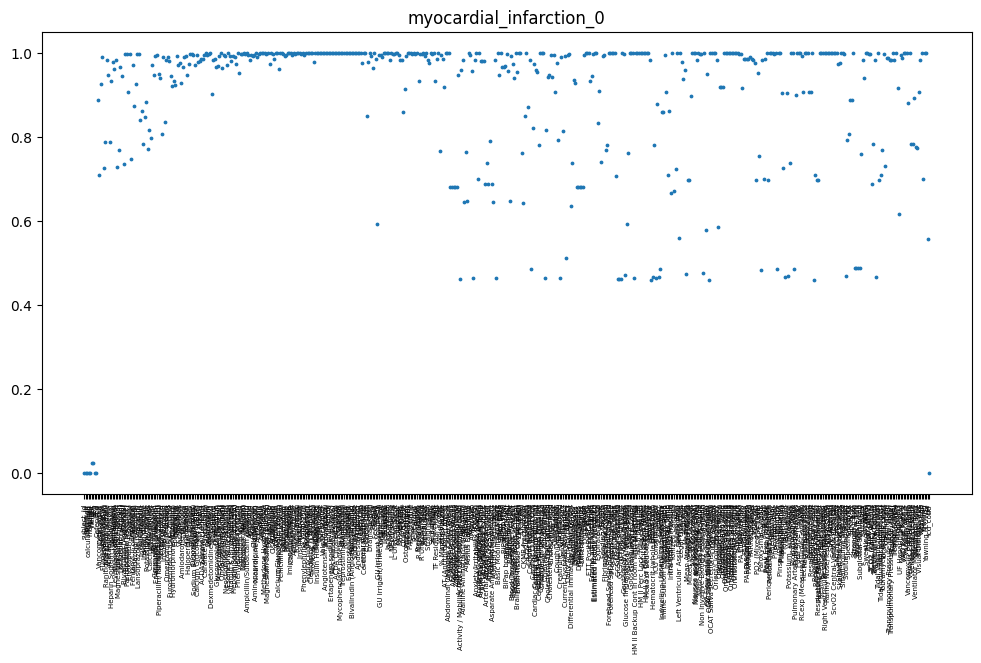

(2670, 557)


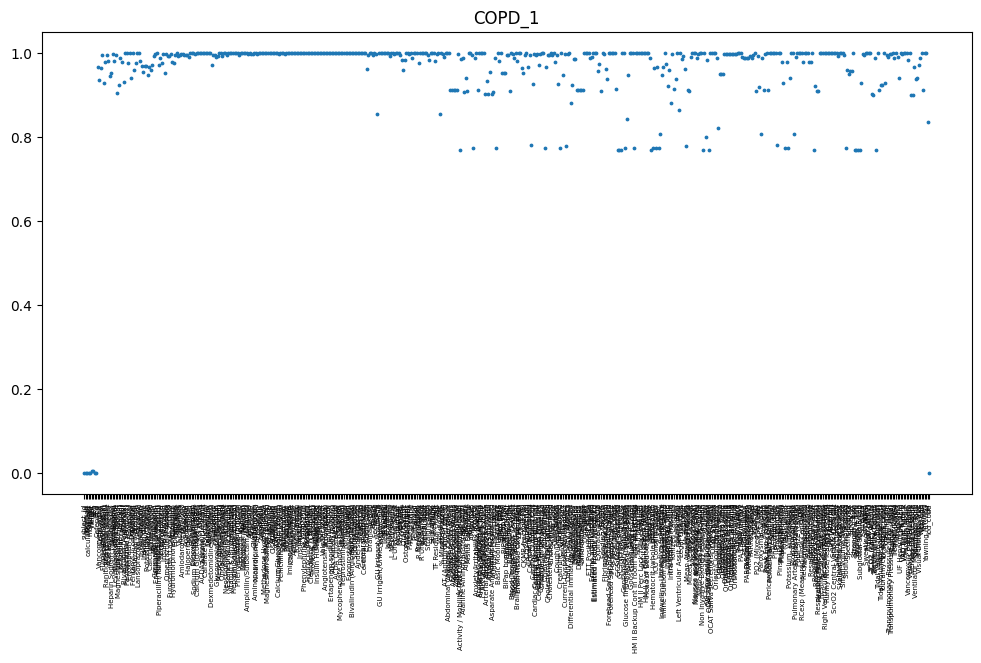

(8623, 557)


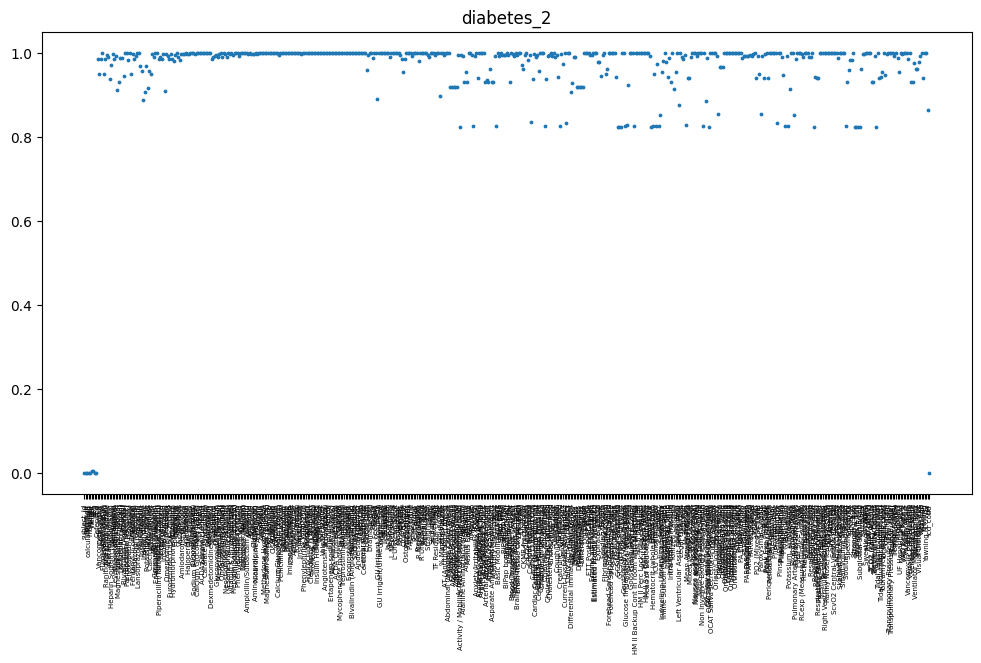

(21253, 557)


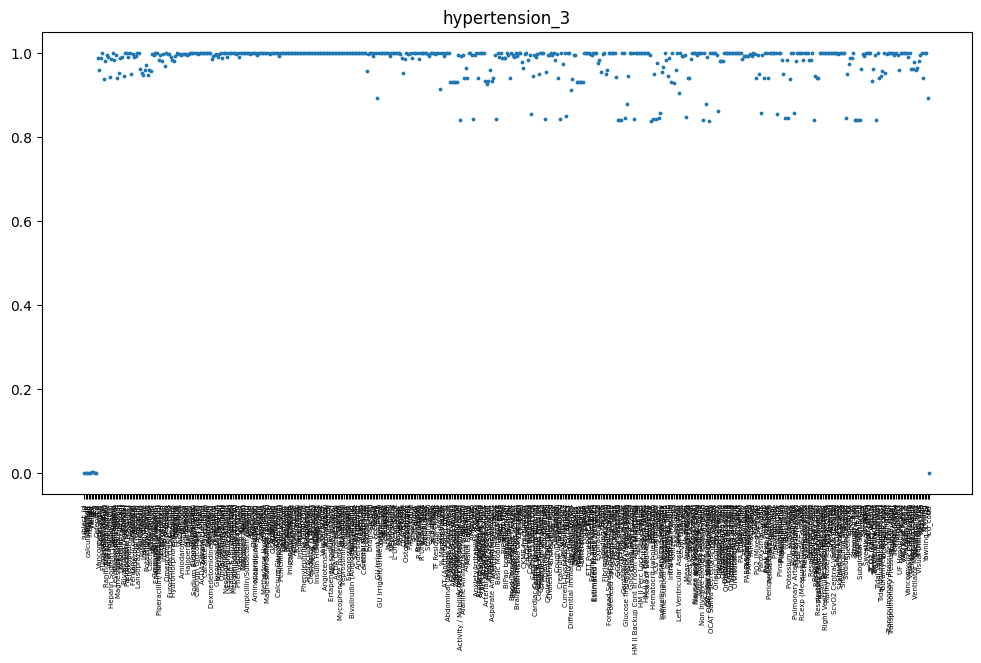

(3944, 557)


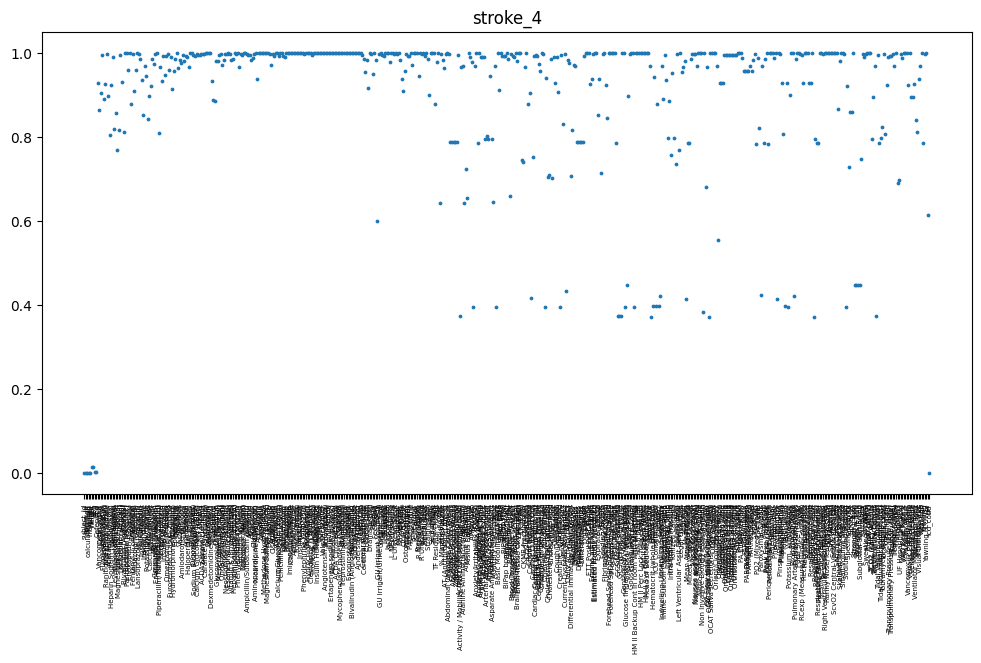

공통 요소 47: {'O2 Flow', 'Foley', 'Glucose', 'PTT', 'subject_id', 'Current Dyspnea Assessment', 'Glucose finger stick (range 70100)', 'Potassium', 'Strength L Arm', 'hadm_id', 'Platelet Count', 'Temperature Celsius', 'calculated_age', 'icd_code', 'Phosphorous', 'INR(PT)', 'Chloride', 'Strength R Arm', 'HCO3 (serum)', 'Calcium nonionized', 'Prothrombin time', 'BPd', 'Sodium', 'Strength L Leg', 'Orientation', 'Anion Gap', 'O2 saturation pulseoxymetry', 'Hemoglobin', 'GCS Motor Response', 'Heart Rate', 'Magnesium', 'location', 'GCS Eye Opening', 'pH', 'GCS Verbal Response', 'Strength R Leg', 'Weight', 'mortality', 'BPs', 'Height', 'Non Invasive Blood Pressure mean', 'Activity / Mobility (JHHLM)', 'ICU_WBC', 'Hematocrit', 'Creatinine', 'BUN', 'Respiratory Rate'}
Set 0의 고유 요소 25: {'Cough/Deep Breath', 'Vancomycin_output_chart', 'Pulmonary Artery Pressure mean', 'Heparin Sodium', 'Arterial O2 Saturation', 'Incentive Spirometry', 'Ventilator Mode', 'CKMB fraction (%)', 'Calcium Gluconate', 'Fent

In [40]:
#### null 90% 미만 selection
files = ['myocardial_infarction_0', 'COPD_1', 'diabetes_2', 'hypertension_3', 'stroke_4']

below_90_columns = []
for file in files:
    disease_data = pd.read_csv(f"{path}/5Domain/{file}.csv")
    sbj_mean = disease_data.groupby('subject_id').median(numeric_only=True).reset_index()
    print(sbj_mean.shape)
    below_90 = sbj_mean.loc[:, sbj_mean.isnull().mean() < 0.9].columns
    below_90_columns.append(below_90)
    
    # plt.figure(figsize=(12,6))
    # plt.title(file)
    # plt.scatter(sbj_mean.isnull().mean().index, sbj_mean.isnull().mean().values, s=3)
    # plt.xticks(rotation=90, fontsize=5)
    # plt.show()

# 각 집합 생성
sets = [set(item) for item in below_90_columns]

# 모든 집합의 공통 요소 찾기
common_elements = set.intersection(*sets)

# 각각의 집합에만 포함된 요소 찾기
unique_elements = [s - set.union(*(sets[:i] + sets[i+1:])) for i, s in enumerate(sets)]

# 결과 출력
print(f"공통 요소 {len(common_elements)}: {common_elements}")
for i, unique in enumerate(unique_elements):
    print(f"Set {i}의 고유 요소 {len(unique)}: {unique}")


In [ ]:
import pickle
with open(f'{path}/columns_each_csv.pkl', 'rb') as f:
    loaded_dict = pickle.load(f)

a =0 
b=0
c=0
d=0
e=[]
for elements in unique_elements:
    if elements in loaded_dict['chartevents']:
        print(f"chartevents {elements}: True")
        a+=1
    elif elements in loaded_dict['basic']:
        print(f"basic {elements}: True")
        b+=1            
    # elif elements in loaded_dict['labevents']:
    #     print(f"labevents {elements}: True")
    elif elements in loaded_dict['inputevents']:
        print(f"inputevents {elements}: True")
        c+=1
    elif elements in loaded_dict['outputevents']:
        print(f"outputevents {elements}: True")
        d+=1
    else:
        e.append(elements)

print(a,b,c,d, e)

In [41]:
# 만성질환
[len(item) for item in below_90_columns] 


[150, 54, 50, 47, 138]

In [36]:
#### t-test에 의해 selection
from scipy.stats import ttest_ind

files = ['myocardial_infarction_0', 'COPD_1', 'diabetes_2', 'hypertension_3', 'stroke_4']

ttest_columns = []
for file in files:
    disease_data = pd.read_csv(f"{path}/5Domain/{file}.csv")
    sbj_mean = disease_data.groupby('subject_id').median(numeric_only=True).reset_index()
    
    select_df = sbj_mean[[c for c in sbj_mean if c not in ['subject_id', "hadm_id", 'icd_code']]]
    
    # Separate features and labels
    X = select_df.drop(columns=['mortality'])
    y = select_df['mortality']

    # Perform t-tests
    selected_features = []
    p_values = []
    for feature in X.columns:
        # Split the feature values based on class
        group1 = X[y == 0][feature]
        group2 = X[y == 1][feature]

        # Perform t-test
        t_stat, p_value = ttest_ind(group1, group2, nan_policy='omit')
        p_values.append(p_value)

        # Select feature if p-value is below significance threshold (e.g., 0.05)
        if p_value < 0.05:
            selected_features.append(feature)

    print("\nSelected Features (p-value < 0.05):", selected_features)
    ttest_columns.append(selected_features)

# 각 집합 생성
sets = [set(item) for item in ttest_columns]

# 모든 집합의 공통 요소 찾기
common_elements2 = set.intersection(*sets)

# 각각의 집합에만 포함된 요소 찾기
unique_elements2 = [s - set.union(*(sets[:i] + sets[i+1:])) for i, s in enumerate(sets)]

# 결과 출력
print(f"공통 요소 {len(common_elements2)}: {common_elements2}")
for i, unique in enumerate(unique_elements2):
    print(f"Set {i}의 고유 요소 {len(unique)}: {unique}")


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:7030: RuntimeWarning: invalid value encountered in scalar divide
  svar = ((n1 - 1) * v1 + (n2 - 1) * v2) / df



Selected Features (p-value < 0.05): ['location', 'calculated_age', 'Height', 'Weight', 'Furosemide (Lasix)', 'Morphine Sulfate', 'Magnesium Sulfate (Bolus)', 'Lorazepam (Ativan)', 'Propofol', 'Dopamine', 'Fentanyl (Concentrate)', 'Nitroglycerin', 'Cefazolin', 'Insulin Regular', 'Insulin Glargine', 'Phenylephrine', 'Potassium Chloride', 'Norepinephrine', 'Furosemide (Lasix) 250/50', 'Epinephrine', 'Vasopressin', 'Digoxin (Lanoxin)', 'Citrate', 'ACDA Citrate (1000ml)', 'Dexmedetomidine (Precedex)', 'Glycopyrolate (Robinul)', 'Phenylephrine (50/250)', 'Insulin Novolog', 'Chest Tube', 'Foley', 'Oral Gastric', 'PreAdmission', 'R Pleural', 'Rectal Tube', 'Straight Cath', 'TF Residual', 'Void', 'Activated Clotting Time', 'Activity / Mobility (JHHLM)', 'Activity / Mobility (RN Daily Mobility Goal)', 'Alanine Aminotransferase (ALT)', 'Albumin', 'Alkaline Phosphate', 'Amylase', 'Anion Gap', 'Apnea Interval', 'Arctic Sun Water Temp', 'Arterial Base Excess', 'Arterial Blood Pressure mean', 'Arter

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:7030: RuntimeWarning: invalid value encountered in scalar divide
  svar = ((n1 - 1) * v1 + (n2 - 1) * v2) / df



Selected Features (p-value < 0.05): ['location', 'calculated_age', 'Height', 'Weight', 'Furosemide (Lasix)', 'Propofol', 'Insulin Regular', 'Phenylephrine', 'Na Phos', 'Labetalol', 'Glycopyrolate (Robinul)', 'TF Residual', 'Albumin', 'Arctic Sun/Alsius Set Temp', 'BUN', 'Chloride', 'Chloride, Whole Blood', 'Cortisol', 'Cough/Deep Breath', 'Creatinine', 'Current Dyspnea Assessment', 'Daily Weight', 'DifferentialLymphs', 'Fibrinogen, Functional', 'GCS Eye Opening', 'GCS Motor Response', 'GCS Verbal Response', 'Glucose finger stick (range 70100)', 'HCO3 (serum)', 'Heart Rate', 'Hematocrit', 'Hemoglobin', 'O2 Flow', 'Orientation to Person', 'Orientation to Place', 'Orientation to Time', 'PCV Level', 'PSV Level', 'Paw High', 'Phosphorous', 'QTc', 'Respiratory Rate', 'Spont Vt', 'Strength L Arm', 'Strength L Leg', 'Strength R Arm', 'Strength R Leg', 'TCO2 (calc) Venous', 'Temperature Celsius', 'Tidal Volume (observed)', 'Tidal Volume (set)', 'Vancomycin_output_chart', 'Venous CO2 Pressure',

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:7030: RuntimeWarning: invalid value encountered in scalar divide
  svar = ((n1 - 1) * v1 + (n2 - 1) * v2) / df



Selected Features (p-value < 0.05): ['calculated_age', 'Height', 'Weight', 'Furosemide (Lasix)', 'Lorazepam (Ativan)', 'Propofol', 'Dopamine', 'Nitroglycerin', 'Cefazolin', 'Insulin Glargine', 'Phenylephrine', 'Piperacillin/Tazobactam (Zosyn)', 'Ciprofloxacin', 'Insulin Humalog', 'Epinephrine', 'Phenylephrine (50/250)', 'Clindamycin', 'Chest Tube', 'Drainage Bag', 'Foley', 'L Pleural', 'R Pleural', 'Stool', 'Straight Cath', 'Void', 'Activated Clotting Time', 'Activity / Mobility (JHHLM)', 'Activity / Mobility (RN Daily Mobility Goal)', 'Albumin', 'Alkaline Phosphate', 'Anion Gap', 'Asparate Aminotransferase (AST)', 'BUN', 'BiPap EPAP', 'CK (CPK)', 'CKMB', 'Called Out', 'Central Venous Pressure', 'Chloride', 'Creatinine', 'DDimer', 'Daily Weight', 'DifferentialBands', 'Expiratory Ratio', 'GCS Eye Opening', 'GCS Motor Response', 'GCS Verbal Response', 'Hemoglobin', 'Inspiratory Ratio', 'Inspiratory Time', 'Lactic Acid', 'Legal Guardian', 'Mean Airway Pressure', 'Minute Volume', 'Mixed V

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:7030: RuntimeWarning: invalid value encountered in scalar divide
  svar = ((n1 - 1) * v1 + (n2 - 1) * v2) / df



Selected Features (p-value < 0.05): ['calculated_age', 'Height', 'Weight', 'Furosemide (Lasix)', 'AcetaminophenIV', 'Propofol', 'Fentanyl', 'Midazolam (Versed)', 'Nitroglycerin', 'Insulin Regular', 'Insulin Glargine', 'Phenylephrine', 'Norepinephrine', 'Furosemide (Lasix) 250/50', 'Epinephrine', 'Alteplase (TPA)', 'Phenylephrine (50/250)', 'Clindamycin', 'Calcium Chloride', 'Clevidipine (Cleviprex)', 'Chest Tube', 'Condom Cath', 'Foley', 'Nasogastric', 'Oral Gastric', 'Straight Cath', 'Void', 'Activated Clotting Time', 'Activity / Mobility (JHHLM)', 'Activity / Mobility (RN Daily Mobility Goal)', 'Agitation', 'Alanine Aminotransferase (ALT)', 'Albumin', 'Alkaline Phosphate', 'Anion Gap', 'Arterial Blood Pressure mean', 'Arterial O2 pressure', 'Asparate Aminotransferase (AST)', 'BUN', 'Basic Mobility (AMPAC)', 'BiPap EPAP', 'Bilirubin, Direct', 'Bilirubin, Total', 'Brain Natiuretic Peptide (BNP)', 'CKMB fraction (%)', 'CO2 production', 'Cardiac Output (CCO)', 'Cardiac Output (thermodil

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:7030: RuntimeWarning: invalid value encountered in scalar divide
  svar = ((n1 - 1) * v1 + (n2 - 1) * v2) / df



Selected Features (p-value < 0.05): ['location', 'calculated_age', 'Height', 'Weight', 'Furosemide (Lasix)', 'Heparin Sodium', 'Morphine Sulfate', 'Lorazepam (Ativan)', 'Propofol', 'Insulin Regular', 'KCL (Bolus)', 'Hydromorphone (Dilaudid)', 'Sodium Bicarbonate 8.4%', 'Insulin NPH', 'Phenylephrine (50/250)', 'Magnesium Sulfate (OBGYN)', 'Cerebral Subdural', 'Condom Cath', 'Drainage Bag', 'Foley', 'OR EBL', 'PACU Gastric', 'Straight Cath', 'Tap', 'Void', 'Wound Vac', '% Minute Volume', 'Absolute Count Neuts', 'Activity / Mobility (JHHLM)', 'Activity / Mobility (RN Daily Mobility Goal)', 'Alanine Aminotransferase (ALT)', 'Albumin', 'Alkaline Phosphate', 'Ammonia', 'Anion Gap', 'Arctic Sun Water Temp', 'Asparate Aminotransferase (AST)', 'Auditory Disturbance', 'BUN', 'Basic Mobility (AMPAC)', 'Bilirubin, Total', 'Bladder Pressure', 'Brain Natiuretic Peptide (BNP)', 'CKMB', 'CKMB fraction (%)', 'CO2 production', 'CReactive Protein', 'Calcium nonionized', 'Cardiac Output (thermodilution)'

In [ ]:
import pickle
with open(f'{path}/columns_each_csv.pkl', 'rb') as f:
    loaded_dict = pickle.load(f)

a =0 
b=0
c=0
d=0
e=[]
for elements in unique_elements2:
    if elements in loaded_dict['chartevents']:
        print(f"chartevents {elements}: True")
        a+=1
    elif elements in loaded_dict['basic']:
        print(f"basic {elements}: True")
        b+=1            
    # elif elements in loaded_dict['labevents']:
    #     print(f"labevents {elements}: True")
    elif elements in loaded_dict['inputevents']:
        print(f"inputevents {elements}: True")
        c+=1
    elif elements in loaded_dict['outputevents']:
        print(f"outputevents {elements}: True")
        d+=1
    else:
        e.append(elements)

print(a,b,c,d, e)

In [4]:
#### null 90% 미만 + t-test에 의해 selection
from scipy.stats import ttest_ind

files = ['myocardial_infarction_0', 'COPD_1', 'diabetes_2', 'hypertension_3', 'stroke_4']

below_90_median_ttest_columns = []
for file in files:
    disease_data = pd.read_csv(f"{path}/5Domain/{file}.csv")
    sbj_mean = disease_data.groupby('subject_id').median(numeric_only=True).reset_index()
    # print(sbj_mean.isnull().mean())
    below_90_median = sbj_mean.loc[:, sbj_mean.isnull().mean() < 0.9].columns
    
    select_df = sbj_mean[[c for c in below_90_median if c not in ['subject_id', "hadm_id", 'icd_code']]]
    # Separate features and labels
    X = select_df.drop(columns=['mortality'])
    y = select_df['mortality']

    # Perform t-tests
    selected_features = []
    p_values = []
    for feature in X.columns:
        # Split the feature values based on class
        group1 = X[y == 0][feature]
        group2 = X[y == 1][feature]

        # Perform t-test
        t_stat, p_value = ttest_ind(group1, group2, nan_policy='omit')
        p_values.append(p_value)

        # Select feature if p-value is below significance threshold (e.g., 0.05)
        if p_value < 0.05:
            selected_features.append(feature)

    print("\nSelected Features (p-value < 0.05):", selected_features)
    below_90_median_ttest_columns.append(selected_features)

# 각 집합 생성
sets = [set(item) for item in below_90_median_ttest_columns]

# 모든 집합의 공통 요소 찾기
common_elements3 = set.intersection(*sets)

# 각각의 집합에만 포함된 요소 찾기
unique_elements3 = [s - set.union(*(sets[:i] + sets[i+1:])) for i, s in enumerate(sets)]

# 결과 출력
print(f"공통 요소 {len(common_elements3)}: {common_elements3}")
for i, unique in enumerate(unique_elements3):
    print(f"Set {i}의 고유 요소 {len(unique)}: {unique}")


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)



Selected Features (p-value < 0.05): ['location', 'calculated_age', 'Height', 'Weight', 'Furosemide (Lasix)', 'Magnesium Sulfate (Bolus)', 'Propofol', 'Fentanyl (Concentrate)', 'Nitroglycerin', 'Cefazolin', 'Insulin Regular', 'Insulin Glargine', 'Phenylephrine', 'Potassium Chloride', 'Norepinephrine', 'Chest Tube', 'Foley', 'Void', 'Activity / Mobility (JHHLM)', 'Alanine Aminotransferase (ALT)', 'Albumin', 'Alkaline Phosphate', 'Anion Gap', 'Apnea Interval', 'Arterial Base Excess', 'Arterial Blood Pressure mean', 'Arterial CO2 Pressure', 'Arterial O2 Saturation', 'Arterial O2 pressure', 'Asparate Aminotransferase (AST)', 'BUN', 'Bilirubin, Total', 'CO2 production', 'Calcium nonionized', 'Called Out', 'Central Venous Pressure', 'Chloride', 'Cough/Deep Breath', 'Creatinine', 'Current Dyspnea Assessment', 'EtCO2', 'Flow Rate (L/min)', 'Fspn High', 'GCS Eye Opening', 'GCS Motor Response', 'GCS Verbal Response', 'Glucose', 'Glucose finger stick (range 70100)', 'HCO3 (serum)', 'Heart Rate', 

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)



Selected Features (p-value < 0.05): ['location', 'calculated_age', 'Height', 'Weight', 'BUN', 'Chloride', 'Creatinine', 'Current Dyspnea Assessment', 'Daily Weight', 'GCS Eye Opening', 'GCS Motor Response', 'GCS Verbal Response', 'Glucose finger stick (range 70100)', 'HCO3 (serum)', 'Heart Rate', 'Hematocrit', 'Hemoglobin', 'O2 Flow', 'Phosphorous', 'Respiratory Rate', 'Strength L Arm', 'Strength L Leg', 'Strength R Arm', 'Strength R Leg', 'TCO2 (calc) Venous', 'Temperature Celsius', 'Venous CO2 Pressure']


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)



Selected Features (p-value < 0.05): ['calculated_age', 'Height', 'Weight', 'Foley', 'Void', 'Activity / Mobility (JHHLM)', 'Anion Gap', 'BUN', 'Chloride', 'Creatinine', 'GCS Eye Opening', 'GCS Motor Response', 'GCS Verbal Response', 'Hemoglobin', 'Lactic Acid', 'Non Invasive Blood Pressure mean', 'O2 Flow', 'O2 saturation pulseoxymetry', 'PTT', 'Phosphorous', 'Potassium', 'Respiratory Rate', 'Strength L Arm', 'Strength L Leg', 'Strength R Arm', 'Strength R Leg']


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)



Selected Features (p-value < 0.05): ['calculated_age', 'Height', 'Weight', 'Foley', 'Activity / Mobility (JHHLM)', 'Anion Gap', 'BUN', 'Creatinine', 'Current Dyspnea Assessment', 'GCS Eye Opening', 'GCS Motor Response', 'GCS Verbal Response', 'Glucose', 'Glucose finger stick (range 70100)', 'Heart Rate', 'Magnesium', 'Non Invasive Blood Pressure mean', 'O2 Flow', 'O2 saturation pulseoxymetry', 'PTT', 'Phosphorous', 'Potassium', 'Respiratory Rate', 'Sodium', 'Strength L Arm', 'Strength L Leg', 'Strength R Arm', 'Strength R Leg', 'Temperature Celsius']

Selected Features (p-value < 0.05): ['location', 'calculated_age', 'Height', 'Weight', 'Furosemide (Lasix)', 'Morphine Sulfate', 'Propofol', 'Insulin Regular', 'KCL (Bolus)', 'Foley', 'Straight Cath', 'Void', 'Absolute Count Neuts', 'Activity / Mobility (JHHLM)', 'Alanine Aminotransferase (ALT)', 'Albumin', 'Alkaline Phosphate', 'Anion Gap', 'Asparate Aminotransferase (AST)', 'BUN', 'Bilirubin, Total', 'CKMB', 'CO2 production', 'Calcium 

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
import pickle
with open(f'{path}/columns_each_csv.pkl', 'rb') as f:
    loaded_dict = pickle.load(f)

a =0 
b=0
c=0
d=0
e=[]
for elements in unique_elements3:
    if elements in loaded_dict['chartevents']:
        print(f"chartevents {elements}: True")
        a+=1
    elif elements in loaded_dict['basic']:
        print(f"basic {elements}: True")
        b+=1            
    # elif elements in loaded_dict['labevents']:
    #     print(f"labevents {elements}: True")
    elif elements in loaded_dict['inputevents']:
        print(f"inputevents {elements}: True")
        c+=1
    elif elements in loaded_dict['outputevents']:
        print(f"outputevents {elements}: True")
        d+=1
    else:
        e.append(elements)

print(a,b,c,d, e)

In [5]:
pd.DataFrame(common_elements3)

,0
0,Strength R Leg
1,BUN
2,O2 Flow
3,Creatinine
4,calculated_age
5,GCS Verbal Response
6,Weight
7,Strength L Arm
8,Height
9,GCS Eye Opening


In [ ]:
files = ['myocardial_infarction_0', 'COPD_1', 'diabetes_2', 'hypertension_3', 'stroke_4']

below_90_median_ttest_columns = []
for file in files:
    disease_data = pd.read_csv(f"{path}/5Domain/{file}.csv")
    disease_data[common_elements3]

In [16]:
import pickle
with open(f'{path}/columns_each_csv.pkl', 'rb') as f:
    loaded_dict = pickle.load(f)

for elements in common_elements3:
    if elements in loaded_dict['chartevents']:
        print(f"chartevents {elements}: True")
    elif elements in loaded_dict['labevents']:
        print(f"labevents {elements}: True")
    elif elements in loaded_dict['inputevents']:
        print(f"inputevents {elements}: True")
    elif elements in loaded_dict['outputevents']:
        print(f"outputevents {elements}: True")


Height
Strength R Arm: True
Strength L Arm: True
GCS Verbal Response: True
Creatinine: True
GCS Eye Opening: True
Weight
Respiratory Rate: True
Strength R Leg: True
O2 Flow: True
calculated_age
BUN: True
GCS Motor Response: True
Strength L Leg: True


In [22]:
disease_data[[col for col in loaded_dict['inputevents'] if col not in ['Vancomycin', 'Tobramycin', 'Gentamicin']]+['Vancomycin_input', 'Tobramycin_input', 'Gentamicin_input']].fillna(0, inplace=True)

/tmp/ipykernel_819322/1829382499.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disease_data[[col for col in loaded_dict['inputevents'] if col not in ['Vancomycin', 'Tobramycin', 'Gentamicin']]+['Vancomycin_input', 'Tobramycin_input', 'Gentamicin_input']].fillna(0, inplace=True)


In [23]:
# list(common_elements3).append(['unique_id', 'time'])
disease_data[common_elements3]

/tmp/ipykernel_819322/859969864.py:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  disease_data[common_elements3]


,Height,Strength R Arm,Strength L Arm,GCS Verbal Response,Creatinine,GCS Eye Opening,Weight,Respiratory Rate,Strength R Leg,O2 Flow,calculated_age,BUN,GCS Motor Response,Strength L Leg
0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,73,NaN,NaN,NaN
1,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,73,NaN,NaN,NaN
2,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,73,NaN,NaN,NaN
3,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,73,NaN,NaN,NaN
4,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,73,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555204,157.0,NaN,NaN,NaN,NaN,NaN,42.2,NaN,NaN,NaN,54,NaN,NaN,NaN
555205,157.0,5.0,5.0,5.0,NaN,4.0,42.2,18.5,5.0,NaN,54,NaN,6.0,5.0
555206,157.0,NaN,NaN,NaN,NaN,NaN,42.2,NaN,NaN,NaN,54,NaN,NaN,NaN
555207,157.0,NaN,NaN,NaN,NaN,NaN,42.2,16.0,NaN,NaN,54,NaN,NaN,NaN


In [26]:
disease_data['Strength R Arm'][disease_data['Strength R Arm'].notnull()].unique()

array([5.        , 0.        , 2.        , 3.        , 4.        ,
       1.        , 4.5       , 3.5       , 2.5       , 1.5       ,
       4.83333333, 0.66666667, 4.25      , 2.4       , 2.33333333,
       4.66666667, 3.33333333, 4.33333333, 3.66666667, 3.16666667,
       4.6       , 0.4       , 2.66666667, 3.8       , 1.66666667,
       3.75      , 0.5       , 4.75      , 4.16666667, 2.6       ,
       3.2       , 2.25      , 2.75      , 1.33333333, 0.33333333,
       4.2       , 4.14285714, 4.4       , 3.4       , 4.57142857,
       4.875     , 3.375     , 1.75      , 3.125     , 1.25      ,
       4.72727273, 1.8       , 3.25      , 0.2       , 2.83333333,
       4.8       , 0.25      , 4.77777778])

In [28]:
loaded_dict['outputevents']

['Anderson',
 'Anderson (gastric)',
 'Blakemore',
 'Cath Lab',
 'Cerebral Subdural',
 'Cerebral Ventricular',
 'Chest Tube',
 'Condom Cath',
 'Davol',
 'Drainage Bag',
 'Emesis',
 'Ewald',
 'Fecal Bag',
 'Foley',
 'GU Irrigant Volume In',
 'GU Irrigant/Urine Volume Out',
 'Gastric Tube',
 'Hemovac',
 'Ileoconduit',
 'JP Lateral',
 'JP Medial',
 'Jackson Pratt',
 'Jejunostomy',
 'L Nephrostomy',
 'L Pleural',
 'L Ureteral Stent',
 'Lumbar',
 'Mediastinal',
 'Nasogastric',
 'OR EBL',
 'OR Urine',
 'Oral Gastric',
 'Ostomy (output)',
 'PACU Drains',
 'PACU EBL',
 'PACU Gastric',
 'PACU Urine',
 'Penrose',
 'Pericardial',
 'Pigtail',
 'PreAdmission',
 'R Nephrostomy',
 'R Pleural',
 'R Ureteral Stent',
 'Rectal Tube',
 'Red Rubber',
 'Stool',
 'Straight Cath',
 'Sump',
 'Suprapubic',
 'T Tube',
 'TF Residual',
 'TF Residual Output',
 'Tap',
 'Void',
 'Wound Vac']

In [40]:
c='Cath Lab'
disease_data[c][disease_data[c].notnull()].unique()

array([   0.,  400.,  150.,  300.,   50., 1100.,  500., 1500.,  600.,
        900.,  775., 1800.,  310., 1000.,  200.,  750.])

In [46]:
disease_data.head()

,subject_id,hadm_id,time,location,calculated_age,gender,anchor_year_group,mortality,Height,Weight,...,Ventilator Type,Visual Disturbances,Vital Cap,Vti High,Yawning,Yawning (COWS),pH,unique_id,icd_code,long_title
0,10003299,29323205,2181-10-22 11:00:00,36,73,F,2008 - 2010,1,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10003299_29323205,4,"Cerebral infarction, unspecified"
1,10003299,29323205,2181-10-22 12:00:00,36,73,F,2008 - 2010,1,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10003299_29323205,4,"Cerebral infarction, unspecified"
2,10003299,29323205,2181-10-22 13:00:00,36,73,F,2008 - 2010,1,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10003299_29323205,4,"Cerebral infarction, unspecified"
3,10003299,29323205,2181-10-22 14:00:00,36,73,F,2008 - 2010,1,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10003299_29323205,4,"Cerebral infarction, unspecified"
4,10003299,29323205,2181-10-22 15:00:00,36,73,F,2008 - 2010,1,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10003299_29323205,4,"Cerebral infarction, unspecified"


In [61]:
disease_data[[col for col in loaded_dict['outputevents'] if col not in ['Vancomycin', 'Tobramycin', 'Gentamicin']]+['Vancomycin_output_chart', 'Tobramycin_output_chart', 'Gentamicin_output_chart']].notnull().sum() # .fillna(0, inplace=True)

Anderson                            0
Anderson (gastric)                  0
Blakemore                           0
Cath Lab                           21
Cerebral Subdural                1233
Cerebral Ventricular            20201
Chest Tube                       2989
Condom Cath                      3774
Davol                               6
Drainage Bag                       53
Emesis                            346
Ewald                               1
Fecal Bag                         247
Foley                           78567
GU Irrigant Volume In              33
GU Irrigant/Urine Volume Out       26
Gastric Tube                       48
Hemovac                           233
Ileoconduit                        33
JP Lateral                         79
JP Medial                          99
Jackson Pratt                    1124
Jejunostomy                         0
L Nephrostomy                     168
L Pleural                         193
L Ureteral Stent                    0
Lumbar      

In [52]:
disease_data['time'] = pd.to_datetime(disease_data['time'])
disease_data['adjust_time'] = disease_data.groupby('unique_id')['time'].transform(lambda x: (x - x.min()).dt.total_seconds())

In [57]:
disease_data['unique_id'].astype(int)

0         1000329929323205
1         1000329929323205
2         1000329929323205
3         1000329929323205
4         1000329929323205
                ...       
555204    1998912621824927
555205    1998912621824927
555206    1998912621824927
555207    1998912621824927
555208    1998912621824927
Name: unique_id, Length: 555209, dtype: int64